In [1]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
import os,os.path
import gensim,re 

2017-06-29 08:32:41,040 : INFO : 'pattern' package not found; tag filters are not available for English


In [3]:
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for each in os.listdir(self.dirname):
            logging.info('INITIATED: Processing sentences for '+each)
            with open(os.path.join(self.dirname,each,'sentences.txt'),'r') as fin:
                for line in fin:
                    review_text = re.sub("[^a-zA-Z]"," ",line.decode('utf-8'))
                    yield review_text.split()

In [4]:
sentences = MySentences('./stackexchange')

In [12]:
from collections import defaultdict
d = defaultdict(lambda : 0)
for each in sentences:
    d[len(each)] += 1


2017-06-29 05:39:29,350 : INFO : INITIATED: Processing sentences for earthscience.stackexchange.com
2017-06-29 05:39:30,067 : INFO : INITIATED: Processing sentences for meta.webapps.stackexchange.com
2017-06-29 05:39:30,182 : INFO : INITIATED: Processing sentences for economics.stackexchange.com
2017-06-29 05:39:31,334 : INFO : INITIATED: Processing sentences for meta.hinduism.stackexchange.com
2017-06-29 05:39:31,422 : INFO : INITIATED: Processing sentences for meta.webmasters.stackexchange.com
2017-06-29 05:39:31,532 : INFO : INITIATED: Processing sentences for meta.mechanics.stackexchange.com
2017-06-29 05:39:31,618 : INFO : INITIATED: Processing sentences for meta.arduino.stackexchange.com
2017-06-29 05:39:31,667 : INFO : INITIATED: Processing sentences for meta.ell.stackexchange.com
2017-06-29 05:39:31,967 : INFO : INITIATED: Processing sentences for windowsphone.stackexchange.com
2017-06-29 05:39:32,370 : INFO : INITIATED: Processing sentences for meta.freelancing.stackexchange.c

2017-06-29 05:41:30,262 : INFO : INITIATED: Processing sentences for meta.quant.stackexchange.com
2017-06-29 05:41:30,348 : INFO : INITIATED: Processing sentences for meta.mathematica.stackexchange.com
2017-06-29 05:41:30,526 : INFO : INITIATED: Processing sentences for meta.ebooks.stackexchange.com
2017-06-29 05:41:30,561 : INFO : INITIATED: Processing sentences for programmers.stackexchange.com
2017-06-29 05:41:51,550 : INFO : INITIATED: Processing sentences for crafts.stackexchange.com
2017-06-29 05:41:51,724 : INFO : INITIATED: Processing sentences for emacs.stackexchange.com
2017-06-29 05:41:53,211 : INFO : INITIATED: Processing sentences for softwarerecs.stackexchange.com
2017-06-29 05:41:54,963 : INFO : INITIATED: Processing sentences for codereview.stackexchange.com
2017-06-29 05:42:07,248 : INFO : INITIATED: Processing sentences for meta.tex.stackexchange.com
2017-06-29 05:42:07,681 : INFO : INITIATED: Processing sentences for freelancing.stackexchange.com
2017-06-29 05:42:08,

2017-06-29 05:44:23,863 : INFO : INITIATED: Processing sentences for meta.stackoverflow.com
2017-06-29 05:44:31,195 : INFO : INITIATED: Processing sentences for bicycles.stackexchange.com
2017-06-29 05:44:34,917 : INFO : INITIATED: Processing sentences for meta.scicomp.stackexchange.com
2017-06-29 05:44:34,976 : INFO : INITIATED: Processing sentences for meta.parenting.stackexchange.com
2017-06-29 05:44:35,128 : INFO : INITIATED: Processing sentences for meta.hsm.stackexchange.com
2017-06-29 05:44:35,189 : INFO : INITIATED: Processing sentences for meta.workplace.stackexchange.com
2017-06-29 05:44:35,659 : INFO : INITIATED: Processing sentences for meta.monero.stackexchange.com
2017-06-29 05:44:35,687 : INFO : INITIATED: Processing sentences for meta.ham.stackexchange.com
2017-06-29 05:44:35,731 : INFO : INITIATED: Processing sentences for meta.opensource.stackexchange.com
2017-06-29 05:44:35,810 : INFO : INITIATED: Processing sentences for meta.tor.stackexchange.com
2017-06-29 05:44:3

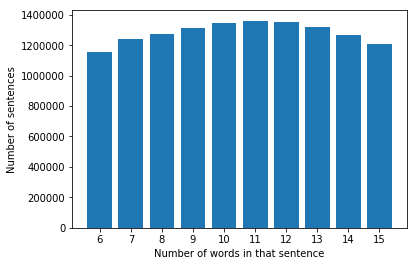

In [28]:
#Identifying proper context parameter for word2vec model training.
import operator
d = dict(sorted(d.iteritems(), key=operator.itemgetter(1), reverse=True)[:10])

import matplotlib.pyplot as plt

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys())
plt.ylabel("Number of sentences")
plt.xlabel("Number of words in that sentence")
plt.savefig('context.jpg')
plt.show()

In [5]:
# Set values for various parameters
#size = 300             # Word vector dimensionality                      
#min_count = 10         # Minimum word count                        
#workers = 4            # Number of threads to run in parallel
#window = 15           # Context window size                                                                                    
#sample = 1e-3          # Downsample setting for frequent words


model = gensim.models.Word2Vec(sentences,  workers=4, size=300, min_count = 1, window = 15, sample = 1e-3)


2017-06-29 08:33:09,199 : INFO : collecting all words and their counts
2017-06-29 08:33:09,201 : INFO : INITIATED: Processing sentences for earthscience.stackexchange.com
2017-06-29 08:33:09,202 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-06-29 08:33:09,495 : INFO : PROGRESS: at sentence #10000, processed 201286 words, keeping 12342 word types
2017-06-29 08:33:09,726 : INFO : PROGRESS: at sentence #20000, processed 398776 words, keeping 17681 word types
2017-06-29 08:33:09,948 : INFO : PROGRESS: at sentence #30000, processed 597677 words, keeping 21206 word types
2017-06-29 08:33:10,169 : INFO : PROGRESS: at sentence #40000, processed 795719 words, keeping 24446 word types
2017-06-29 08:33:10,229 : INFO : INITIATED: Processing sentences for meta.webapps.stackexchange.com
2017-06-29 08:33:10,365 : INFO : PROGRESS: at sentence #50000, processed 967568 words, keeping 26683 word types
2017-06-29 08:33:10,386 : INFO : INITIATED: Processing sentences for e

2017-06-29 08:33:21,904 : INFO : PROGRESS: at sentence #610000, processed 11120570 words, keeping 79426 word types
2017-06-29 08:33:22,094 : INFO : PROGRESS: at sentence #620000, processed 11298500 words, keeping 79916 word types
2017-06-29 08:33:22,290 : INFO : PROGRESS: at sentence #630000, processed 11476832 words, keeping 80399 word types
2017-06-29 08:33:22,477 : INFO : PROGRESS: at sentence #640000, processed 11653706 words, keeping 80894 word types
2017-06-29 08:33:22,667 : INFO : PROGRESS: at sentence #650000, processed 11829215 words, keeping 81452 word types
2017-06-29 08:33:22,863 : INFO : PROGRESS: at sentence #660000, processed 12007336 words, keeping 82249 word types
2017-06-29 08:33:23,063 : INFO : PROGRESS: at sentence #670000, processed 12197892 words, keeping 82735 word types
2017-06-29 08:33:23,259 : INFO : PROGRESS: at sentence #680000, processed 12374510 words, keeping 83208 word types
2017-06-29 08:33:23,463 : INFO : PROGRESS: at sentence #690000, processed 125486

2017-06-29 08:33:34,807 : INFO : PROGRESS: at sentence #1290000, processed 22510014 words, keeping 129859 word types
2017-06-29 08:33:34,995 : INFO : PROGRESS: at sentence #1300000, processed 22681489 words, keeping 130456 word types
2017-06-29 08:33:35,186 : INFO : PROGRESS: at sentence #1310000, processed 22852285 words, keeping 131052 word types
2017-06-29 08:33:35,375 : INFO : PROGRESS: at sentence #1320000, processed 23020552 words, keeping 131632 word types
2017-06-29 08:33:35,560 : INFO : PROGRESS: at sentence #1330000, processed 23186764 words, keeping 132284 word types
2017-06-29 08:33:35,748 : INFO : PROGRESS: at sentence #1340000, processed 23355486 words, keeping 132828 word types
2017-06-29 08:33:35,939 : INFO : PROGRESS: at sentence #1350000, processed 23526100 words, keeping 133471 word types
2017-06-29 08:33:36,126 : INFO : PROGRESS: at sentence #1360000, processed 23693170 words, keeping 134048 word types
2017-06-29 08:33:36,310 : INFO : PROGRESS: at sentence #1370000,

2017-06-29 08:33:48,136 : INFO : INITIATED: Processing sentences for cs.stackexchange.com
2017-06-29 08:33:48,255 : INFO : PROGRESS: at sentence #1980000, processed 34311935 words, keeping 170092 word types
2017-06-29 08:33:48,492 : INFO : PROGRESS: at sentence #1990000, processed 34519870 words, keeping 170812 word types
2017-06-29 08:33:48,718 : INFO : PROGRESS: at sentence #2000000, processed 34716492 words, keeping 171425 word types
2017-06-29 08:33:48,941 : INFO : PROGRESS: at sentence #2010000, processed 34912834 words, keeping 172004 word types
2017-06-29 08:33:49,165 : INFO : PROGRESS: at sentence #2020000, processed 35105080 words, keeping 172583 word types
2017-06-29 08:33:49,393 : INFO : PROGRESS: at sentence #2030000, processed 35303012 words, keeping 173155 word types
2017-06-29 08:33:49,619 : INFO : PROGRESS: at sentence #2040000, processed 35503091 words, keeping 173713 word types
2017-06-29 08:33:49,841 : INFO : PROGRESS: at sentence #2050000, processed 35698634 words, 

2017-06-29 08:34:00,930 : INFO : PROGRESS: at sentence #2580000, processed 45241516 words, keeping 200865 word types
2017-06-29 08:34:01,142 : INFO : PROGRESS: at sentence #2590000, processed 45425484 words, keeping 202772 word types
2017-06-29 08:34:01,153 : INFO : INITIATED: Processing sentences for meta.crypto.stackexchange.com
2017-06-29 08:34:01,272 : INFO : INITIATED: Processing sentences for meta.musicfans.stackexchange.com
2017-06-29 08:34:01,313 : INFO : INITIATED: Processing sentences for meta.languagelearning.stackexchange.com
2017-06-29 08:34:01,361 : INFO : INITIATED: Processing sentences for meta.programmers.stackexchange.com
2017-06-29 08:34:01,378 : INFO : PROGRESS: at sentence #2600000, processed 45611001 words, keeping 203278 word types
2017-06-29 08:34:01,586 : INFO : PROGRESS: at sentence #2610000, processed 45797212 words, keeping 203573 word types
2017-06-29 08:34:01,795 : INFO : PROGRESS: at sentence #2620000, processed 45996189 words, keeping 203818 word types
2

2017-06-29 08:34:14,737 : INFO : PROGRESS: at sentence #3180000, processed 57072794 words, keeping 229131 word types
2017-06-29 08:34:14,967 : INFO : PROGRESS: at sentence #3190000, processed 57268559 words, keeping 229411 word types
2017-06-29 08:34:15,218 : INFO : PROGRESS: at sentence #3200000, processed 57476551 words, keeping 229706 word types
2017-06-29 08:34:15,438 : INFO : PROGRESS: at sentence #3210000, processed 57673853 words, keeping 230034 word types
2017-06-29 08:34:15,681 : INFO : PROGRESS: at sentence #3220000, processed 57870492 words, keeping 230372 word types
2017-06-29 08:34:15,921 : INFO : PROGRESS: at sentence #3230000, processed 58070952 words, keeping 230621 word types
2017-06-29 08:34:16,135 : INFO : PROGRESS: at sentence #3240000, processed 58263955 words, keeping 230914 word types
2017-06-29 08:34:16,377 : INFO : PROGRESS: at sentence #3250000, processed 58460662 words, keeping 231222 word types
2017-06-29 08:34:16,592 : INFO : PROGRESS: at sentence #3260000,

2017-06-29 08:34:28,278 : INFO : PROGRESS: at sentence #3860000, processed 67821569 words, keeping 255591 word types
2017-06-29 08:34:28,457 : INFO : PROGRESS: at sentence #3870000, processed 67972575 words, keeping 255917 word types
2017-06-29 08:34:28,646 : INFO : PROGRESS: at sentence #3880000, processed 68121196 words, keeping 256255 word types
2017-06-29 08:34:28,830 : INFO : PROGRESS: at sentence #3890000, processed 68272988 words, keeping 256610 word types
2017-06-29 08:34:29,024 : INFO : PROGRESS: at sentence #3900000, processed 68427571 words, keeping 256923 word types
2017-06-29 08:34:29,228 : INFO : PROGRESS: at sentence #3910000, processed 68579184 words, keeping 257240 word types
2017-06-29 08:34:29,405 : INFO : PROGRESS: at sentence #3920000, processed 68728583 words, keeping 257520 word types
2017-06-29 08:34:29,608 : INFO : PROGRESS: at sentence #3930000, processed 68877951 words, keeping 257878 word types
2017-06-29 08:34:29,786 : INFO : PROGRESS: at sentence #3940000,

2017-06-29 08:34:41,765 : INFO : PROGRESS: at sentence #4570000, processed 78313313 words, keeping 277392 word types
2017-06-29 08:34:41,947 : INFO : PROGRESS: at sentence #4580000, processed 78461160 words, keeping 277678 word types
2017-06-29 08:34:42,141 : INFO : PROGRESS: at sentence #4590000, processed 78605504 words, keeping 277963 word types
2017-06-29 08:34:42,322 : INFO : PROGRESS: at sentence #4600000, processed 78748980 words, keeping 278244 word types
2017-06-29 08:34:42,519 : INFO : PROGRESS: at sentence #4610000, processed 78895087 words, keeping 278537 word types
2017-06-29 08:34:42,695 : INFO : PROGRESS: at sentence #4620000, processed 79040182 words, keeping 278812 word types
2017-06-29 08:34:42,898 : INFO : PROGRESS: at sentence #4630000, processed 79190160 words, keeping 279129 word types
2017-06-29 08:34:43,081 : INFO : PROGRESS: at sentence #4640000, processed 79339688 words, keeping 279388 word types
2017-06-29 08:34:43,279 : INFO : PROGRESS: at sentence #4650000,

2017-06-29 08:34:55,104 : INFO : PROGRESS: at sentence #5280000, processed 88639843 words, keeping 296794 word types
2017-06-29 08:34:55,287 : INFO : PROGRESS: at sentence #5290000, processed 88783693 words, keeping 297073 word types
2017-06-29 08:34:55,476 : INFO : PROGRESS: at sentence #5300000, processed 88926461 words, keeping 297313 word types
2017-06-29 08:34:55,657 : INFO : PROGRESS: at sentence #5310000, processed 89073048 words, keeping 297571 word types
2017-06-29 08:34:55,847 : INFO : PROGRESS: at sentence #5320000, processed 89211864 words, keeping 297857 word types
2017-06-29 08:34:56,018 : INFO : PROGRESS: at sentence #5330000, processed 89349375 words, keeping 298126 word types
2017-06-29 08:34:56,214 : INFO : PROGRESS: at sentence #5340000, processed 89493784 words, keeping 298377 word types
2017-06-29 08:34:56,385 : INFO : PROGRESS: at sentence #5350000, processed 89634073 words, keeping 298646 word types
2017-06-29 08:34:56,577 : INFO : PROGRESS: at sentence #5360000,

2017-06-29 08:35:08,306 : INFO : PROGRESS: at sentence #5990000, processed 98797159 words, keeping 314779 word types
2017-06-29 08:35:08,497 : INFO : PROGRESS: at sentence #6000000, processed 98938267 words, keeping 314966 word types
2017-06-29 08:35:08,670 : INFO : PROGRESS: at sentence #6010000, processed 99080618 words, keeping 315220 word types
2017-06-29 08:35:08,866 : INFO : PROGRESS: at sentence #6020000, processed 99224361 words, keeping 315455 word types
2017-06-29 08:35:09,048 : INFO : PROGRESS: at sentence #6030000, processed 99370591 words, keeping 315692 word types
2017-06-29 08:35:09,242 : INFO : PROGRESS: at sentence #6040000, processed 99513868 words, keeping 315926 word types
2017-06-29 08:35:09,418 : INFO : PROGRESS: at sentence #6050000, processed 99659986 words, keeping 316198 word types
2017-06-29 08:35:09,591 : INFO : PROGRESS: at sentence #6060000, processed 99800886 words, keeping 316475 word types
2017-06-29 08:35:09,790 : INFO : PROGRESS: at sentence #6070000,

2017-06-29 08:35:19,399 : INFO : INITIATED: Processing sentences for meta.movies.stackexchange.com
2017-06-29 08:35:19,542 : INFO : PROGRESS: at sentence #6560000, processed 106464261 words, keeping 339292 word types
2017-06-29 08:35:19,771 : INFO : PROGRESS: at sentence #6570000, processed 106670828 words, keeping 339779 word types
2017-06-29 08:35:19,801 : INFO : INITIATED: Processing sentences for startups.stackexchange.com
2017-06-29 08:35:20,024 : INFO : PROGRESS: at sentence #6580000, processed 106878544 words, keeping 340127 word types
2017-06-29 08:35:20,267 : INFO : PROGRESS: at sentence #6590000, processed 107080649 words, keeping 340424 word types
2017-06-29 08:35:20,511 : INFO : PROGRESS: at sentence #6600000, processed 107274785 words, keeping 340735 word types
2017-06-29 08:35:20,730 : INFO : PROGRESS: at sentence #6610000, processed 107455292 words, keeping 341059 word types
2017-06-29 08:35:20,972 : INFO : PROGRESS: at sentence #6620000, processed 107644920 words, keepi

2017-06-29 08:35:36,158 : INFO : PROGRESS: at sentence #7210000, processed 119078047 words, keeping 357850 word types
2017-06-29 08:35:36,425 : INFO : PROGRESS: at sentence #7220000, processed 119267232 words, keeping 358127 word types
2017-06-29 08:35:36,654 : INFO : PROGRESS: at sentence #7230000, processed 119450938 words, keeping 358412 word types
2017-06-29 08:35:36,872 : INFO : PROGRESS: at sentence #7240000, processed 119638046 words, keeping 358664 word types
2017-06-29 08:35:37,108 : INFO : PROGRESS: at sentence #7250000, processed 119828937 words, keeping 358918 word types
2017-06-29 08:35:37,190 : INFO : INITIATED: Processing sentences for meta.boardgames.stackexchange.com
2017-06-29 08:35:37,340 : INFO : PROGRESS: at sentence #7260000, processed 120018520 words, keeping 359256 word types
2017-06-29 08:35:37,449 : INFO : INITIATED: Processing sentences for meta.stats.stackexchange.com
2017-06-29 08:35:37,603 : INFO : PROGRESS: at sentence #7270000, processed 120212168 words,

2017-06-29 08:35:49,707 : INFO : PROGRESS: at sentence #7840000, processed 128626979 words, keeping 384602 word types
2017-06-29 08:35:49,900 : INFO : PROGRESS: at sentence #7850000, processed 128761756 words, keeping 385001 word types
2017-06-29 08:35:50,092 : INFO : PROGRESS: at sentence #7860000, processed 128901682 words, keeping 385354 word types
2017-06-29 08:35:50,261 : INFO : PROGRESS: at sentence #7870000, processed 129036173 words, keeping 385718 word types
2017-06-29 08:35:50,446 : INFO : PROGRESS: at sentence #7880000, processed 129174025 words, keeping 386040 word types
2017-06-29 08:35:50,617 : INFO : PROGRESS: at sentence #7890000, processed 129305619 words, keeping 386383 word types
2017-06-29 08:35:50,815 : INFO : PROGRESS: at sentence #7900000, processed 129442702 words, keeping 386786 word types
2017-06-29 08:35:51,030 : INFO : PROGRESS: at sentence #7910000, processed 129578344 words, keeping 387263 word types
2017-06-29 08:35:51,206 : INFO : PROGRESS: at sentence #

2017-06-29 08:36:02,889 : INFO : PROGRESS: at sentence #8430000, processed 138828619 words, keeping 405217 word types
2017-06-29 08:36:03,121 : INFO : PROGRESS: at sentence #8440000, processed 139017267 words, keeping 405583 word types
2017-06-29 08:36:03,343 : INFO : PROGRESS: at sentence #8450000, processed 139213010 words, keeping 405825 word types
2017-06-29 08:36:03,580 : INFO : PROGRESS: at sentence #8460000, processed 139405848 words, keeping 406122 word types
2017-06-29 08:36:03,815 : INFO : PROGRESS: at sentence #8470000, processed 139597476 words, keeping 406370 word types
2017-06-29 08:36:04,033 : INFO : PROGRESS: at sentence #8480000, processed 139792346 words, keeping 406629 word types
2017-06-29 08:36:04,284 : INFO : PROGRESS: at sentence #8490000, processed 139992252 words, keeping 406899 word types
2017-06-29 08:36:04,507 : INFO : PROGRESS: at sentence #8500000, processed 140184561 words, keeping 407235 word types
2017-06-29 08:36:04,746 : INFO : PROGRESS: at sentence #

2017-06-29 08:36:19,679 : INFO : PROGRESS: at sentence #9130000, processed 152793953 words, keeping 427130 word types
2017-06-29 08:36:19,910 : INFO : PROGRESS: at sentence #9140000, processed 152993810 words, keeping 427445 word types
2017-06-29 08:36:20,161 : INFO : PROGRESS: at sentence #9150000, processed 153193622 words, keeping 427796 word types
2017-06-29 08:36:20,397 : INFO : PROGRESS: at sentence #9160000, processed 153389279 words, keeping 428128 word types
2017-06-29 08:36:20,641 : INFO : PROGRESS: at sentence #9170000, processed 153590274 words, keeping 428554 word types
2017-06-29 08:36:20,882 : INFO : PROGRESS: at sentence #9180000, processed 153790935 words, keeping 428950 word types
2017-06-29 08:36:21,103 : INFO : PROGRESS: at sentence #9190000, processed 153985101 words, keeping 429322 word types
2017-06-29 08:36:21,354 : INFO : PROGRESS: at sentence #9200000, processed 154185911 words, keeping 429748 word types
2017-06-29 08:36:21,599 : INFO : PROGRESS: at sentence #

2017-06-29 08:36:34,989 : INFO : PROGRESS: at sentence #9800000, processed 165393611 words, keeping 452096 word types
2017-06-29 08:36:35,190 : INFO : PROGRESS: at sentence #9810000, processed 165562504 words, keeping 452546 word types
2017-06-29 08:36:35,430 : INFO : PROGRESS: at sentence #9820000, processed 165731482 words, keeping 452998 word types
2017-06-29 08:36:35,650 : INFO : PROGRESS: at sentence #9830000, processed 165907391 words, keeping 453490 word types
2017-06-29 08:36:35,841 : INFO : INITIATED: Processing sentences for codereview.stackexchange.com
2017-06-29 08:36:35,871 : INFO : PROGRESS: at sentence #9840000, processed 166077160 words, keeping 454007 word types
2017-06-29 08:36:36,084 : INFO : PROGRESS: at sentence #9850000, processed 166240451 words, keeping 454673 word types
2017-06-29 08:36:36,269 : INFO : PROGRESS: at sentence #9860000, processed 166396670 words, keeping 455262 word types
2017-06-29 08:36:36,473 : INFO : PROGRESS: at sentence #9870000, processed 1

2017-06-29 08:36:48,737 : INFO : PROGRESS: at sentence #10490000, processed 176195444 words, keeping 494391 word types
2017-06-29 08:36:48,945 : INFO : PROGRESS: at sentence #10500000, processed 176352378 words, keeping 494960 word types
2017-06-29 08:36:49,136 : INFO : PROGRESS: at sentence #10510000, processed 176511887 words, keeping 495575 word types
2017-06-29 08:36:49,341 : INFO : PROGRESS: at sentence #10520000, processed 176670372 words, keeping 496181 word types
2017-06-29 08:36:49,531 : INFO : PROGRESS: at sentence #10530000, processed 176826252 words, keeping 496854 word types
2017-06-29 08:36:49,748 : INFO : PROGRESS: at sentence #10540000, processed 176987528 words, keeping 497437 word types
2017-06-29 08:36:49,940 : INFO : PROGRESS: at sentence #10550000, processed 177143659 words, keeping 498120 word types
2017-06-29 08:36:50,154 : INFO : PROGRESS: at sentence #10560000, processed 177298651 words, keeping 498758 word types
2017-06-29 08:36:50,346 : INFO : PROGRESS: at se

2017-06-29 08:37:03,844 : INFO : PROGRESS: at sentence #11150000, processed 188395650 words, keeping 526800 word types
2017-06-29 08:37:04,152 : INFO : PROGRESS: at sentence #11160000, processed 188607381 words, keeping 527168 word types
2017-06-29 08:37:04,414 : INFO : PROGRESS: at sentence #11170000, processed 188815382 words, keeping 527494 word types
2017-06-29 08:37:04,658 : INFO : PROGRESS: at sentence #11180000, processed 189026532 words, keeping 527821 word types
2017-06-29 08:37:04,921 : INFO : PROGRESS: at sentence #11190000, processed 189241956 words, keeping 528136 word types
2017-06-29 08:37:05,161 : INFO : PROGRESS: at sentence #11200000, processed 189457210 words, keeping 528449 word types
2017-06-29 08:37:05,432 : INFO : PROGRESS: at sentence #11210000, processed 189672999 words, keeping 528700 word types
2017-06-29 08:37:05,696 : INFO : PROGRESS: at sentence #11220000, processed 189884980 words, keeping 528992 word types
2017-06-29 08:37:05,935 : INFO : PROGRESS: at se

2017-06-29 08:37:19,632 : INFO : PROGRESS: at sentence #11810000, processed 200969597 words, keeping 571492 word types
2017-06-29 08:37:19,860 : INFO : PROGRESS: at sentence #11820000, processed 201133412 words, keeping 572371 word types
2017-06-29 08:37:20,068 : INFO : PROGRESS: at sentence #11830000, processed 201294043 words, keeping 573207 word types
2017-06-29 08:37:20,289 : INFO : PROGRESS: at sentence #11840000, processed 201452312 words, keeping 574087 word types
2017-06-29 08:37:20,509 : INFO : PROGRESS: at sentence #11850000, processed 201609947 words, keeping 574936 word types
2017-06-29 08:37:20,754 : INFO : PROGRESS: at sentence #11860000, processed 201767823 words, keeping 575837 word types
2017-06-29 08:37:20,949 : INFO : PROGRESS: at sentence #11870000, processed 201923847 words, keeping 576726 word types
2017-06-29 08:37:21,174 : INFO : PROGRESS: at sentence #11880000, processed 202079762 words, keeping 577558 word types
2017-06-29 08:37:21,371 : INFO : PROGRESS: at se

2017-06-29 08:37:34,059 : INFO : PROGRESS: at sentence #12470000, processed 211881238 words, keeping 609646 word types
2017-06-29 08:37:34,323 : INFO : PROGRESS: at sentence #12480000, processed 212097421 words, keeping 609747 word types
2017-06-29 08:37:34,568 : INFO : PROGRESS: at sentence #12490000, processed 212317783 words, keeping 609838 word types
2017-06-29 08:37:34,820 : INFO : PROGRESS: at sentence #12500000, processed 212525229 words, keeping 609967 word types
2017-06-29 08:37:35,074 : INFO : PROGRESS: at sentence #12510000, processed 212740789 words, keeping 610082 word types
2017-06-29 08:37:35,312 : INFO : PROGRESS: at sentence #12520000, processed 212955586 words, keeping 610203 word types
2017-06-29 08:37:35,564 : INFO : PROGRESS: at sentence #12530000, processed 213167067 words, keeping 610303 word types
2017-06-29 08:37:35,807 : INFO : PROGRESS: at sentence #12540000, processed 213378263 words, keeping 610419 word types
2017-06-29 08:37:36,063 : INFO : PROGRESS: at se

2017-06-29 08:37:50,067 : INFO : PROGRESS: at sentence #13150000, processed 225006153 words, keeping 644162 word types
2017-06-29 08:37:50,292 : INFO : PROGRESS: at sentence #13160000, processed 225165238 words, keeping 645208 word types
2017-06-29 08:37:50,488 : INFO : PROGRESS: at sentence #13170000, processed 225327621 words, keeping 646234 word types
2017-06-29 08:37:50,706 : INFO : PROGRESS: at sentence #13180000, processed 225487849 words, keeping 647168 word types
2017-06-29 08:37:50,802 : INFO : INITIATED: Processing sentences for meta.ethereum.stackexchange.com
2017-06-29 08:37:50,852 : INFO : INITIATED: Processing sentences for meta.ai.stackexchange.com
2017-06-29 08:37:50,897 : INFO : INITIATED: Processing sentences for elementaryos.stackexchange.com
2017-06-29 08:37:50,955 : INFO : PROGRESS: at sentence #13190000, processed 225647476 words, keeping 647806 word types
2017-06-29 08:37:51,154 : INFO : PROGRESS: at sentence #13200000, processed 225789062 words, keeping 647989 w

2017-06-29 08:38:03,980 : INFO : PROGRESS: at sentence #13780000, processed 235473056 words, keeping 685285 word types
2017-06-29 08:38:04,170 : INFO : PROGRESS: at sentence #13790000, processed 235629583 words, keeping 685730 word types
2017-06-29 08:38:04,370 : INFO : PROGRESS: at sentence #13800000, processed 235783464 words, keeping 686173 word types
2017-06-29 08:38:04,558 : INFO : PROGRESS: at sentence #13810000, processed 235937730 words, keeping 686607 word types
2017-06-29 08:38:04,768 : INFO : PROGRESS: at sentence #13820000, processed 236090426 words, keeping 687058 word types
2017-06-29 08:38:04,962 : INFO : PROGRESS: at sentence #13830000, processed 236243242 words, keeping 687480 word types
2017-06-29 08:38:05,170 : INFO : PROGRESS: at sentence #13840000, processed 236395834 words, keeping 687883 word types
2017-06-29 08:38:05,359 : INFO : PROGRESS: at sentence #13850000, processed 236546452 words, keeping 688372 word types
2017-06-29 08:38:05,567 : INFO : PROGRESS: at se

2017-06-29 08:38:18,185 : INFO : PROGRESS: at sentence #14470000, processed 245804228 words, keeping 714099 word types
2017-06-29 08:38:18,381 : INFO : PROGRESS: at sentence #14480000, processed 245953181 words, keeping 714493 word types
2017-06-29 08:38:18,592 : INFO : PROGRESS: at sentence #14490000, processed 246102293 words, keeping 714903 word types
2017-06-29 08:38:18,796 : INFO : PROGRESS: at sentence #14500000, processed 246248614 words, keeping 715281 word types
2017-06-29 08:38:19,007 : INFO : PROGRESS: at sentence #14510000, processed 246398058 words, keeping 715661 word types
2017-06-29 08:38:19,203 : INFO : PROGRESS: at sentence #14520000, processed 246547636 words, keeping 715998 word types
2017-06-29 08:38:19,418 : INFO : PROGRESS: at sentence #14530000, processed 246694415 words, keeping 716319 word types
2017-06-29 08:38:19,634 : INFO : PROGRESS: at sentence #14540000, processed 246840883 words, keeping 716749 word types
2017-06-29 08:38:19,835 : INFO : PROGRESS: at se

2017-06-29 08:38:32,887 : INFO : PROGRESS: at sentence #15090000, processed 256684348 words, keeping 738301 word types
2017-06-29 08:38:33,188 : INFO : PROGRESS: at sentence #15100000, processed 256876675 words, keeping 738804 word types
2017-06-29 08:38:33,466 : INFO : PROGRESS: at sentence #15110000, processed 257071016 words, keeping 739273 word types
2017-06-29 08:38:33,699 : INFO : PROGRESS: at sentence #15120000, processed 257258030 words, keeping 739684 word types
2017-06-29 08:38:33,941 : INFO : PROGRESS: at sentence #15130000, processed 257447458 words, keeping 740177 word types
2017-06-29 08:38:34,184 : INFO : PROGRESS: at sentence #15140000, processed 257637806 words, keeping 740610 word types
2017-06-29 08:38:34,426 : INFO : PROGRESS: at sentence #15150000, processed 257824328 words, keeping 741097 word types
2017-06-29 08:38:34,651 : INFO : PROGRESS: at sentence #15160000, processed 258012432 words, keeping 741619 word types
2017-06-29 08:38:34,914 : INFO : PROGRESS: at se

2017-06-29 08:38:48,105 : INFO : PROGRESS: at sentence #15750000, processed 268286138 words, keeping 767701 word types
2017-06-29 08:38:48,290 : INFO : PROGRESS: at sentence #15760000, processed 268432965 words, keeping 768076 word types
2017-06-29 08:38:48,498 : INFO : PROGRESS: at sentence #15770000, processed 268580169 words, keeping 768441 word types
2017-06-29 08:38:48,695 : INFO : PROGRESS: at sentence #15780000, processed 268727256 words, keeping 768795 word types
2017-06-29 08:38:48,896 : INFO : PROGRESS: at sentence #15790000, processed 268867673 words, keeping 769154 word types
2017-06-29 08:38:49,081 : INFO : PROGRESS: at sentence #15800000, processed 269013984 words, keeping 769476 word types
2017-06-29 08:38:49,281 : INFO : PROGRESS: at sentence #15810000, processed 269158732 words, keeping 769849 word types
2017-06-29 08:38:49,488 : INFO : PROGRESS: at sentence #15820000, processed 269304091 words, keeping 770181 word types
2017-06-29 08:38:49,685 : INFO : PROGRESS: at se

2017-06-29 08:38:59,973 : INFO : PROGRESS: at sentence #16300000, processed 276901003 words, keeping 786158 word types
2017-06-29 08:39:00,233 : INFO : PROGRESS: at sentence #16310000, processed 277108966 words, keeping 786879 word types
2017-06-29 08:39:00,469 : INFO : PROGRESS: at sentence #16320000, processed 277311022 words, keeping 787540 word types
2017-06-29 08:39:00,737 : INFO : PROGRESS: at sentence #16330000, processed 277509769 words, keeping 788159 word types
2017-06-29 08:39:00,997 : INFO : PROGRESS: at sentence #16340000, processed 277711431 words, keeping 788863 word types
2017-06-29 08:39:01,230 : INFO : PROGRESS: at sentence #16350000, processed 277908530 words, keeping 789473 word types
2017-06-29 08:39:01,515 : INFO : PROGRESS: at sentence #16360000, processed 278108071 words, keeping 790073 word types
2017-06-29 08:39:01,773 : INFO : PROGRESS: at sentence #16370000, processed 278307857 words, keeping 790716 word types
2017-06-29 08:39:02,009 : INFO : PROGRESS: at se

2017-06-29 08:39:17,287 : INFO : PROGRESS: at sentence #16990000, processed 290329604 words, keeping 822134 word types
2017-06-29 08:39:17,539 : INFO : PROGRESS: at sentence #17000000, processed 290521538 words, keeping 822569 word types
2017-06-29 08:39:17,764 : INFO : PROGRESS: at sentence #17010000, processed 290708374 words, keeping 822937 word types
2017-06-29 08:39:18,014 : INFO : PROGRESS: at sentence #17020000, processed 290893061 words, keeping 823436 word types
2017-06-29 08:39:18,244 : INFO : PROGRESS: at sentence #17030000, processed 291081514 words, keeping 823865 word types
2017-06-29 08:39:18,473 : INFO : PROGRESS: at sentence #17040000, processed 291268312 words, keeping 824253 word types
2017-06-29 08:39:18,723 : INFO : PROGRESS: at sentence #17050000, processed 291456106 words, keeping 824686 word types
2017-06-29 08:39:18,956 : INFO : PROGRESS: at sentence #17060000, processed 291650659 words, keeping 825095 word types
2017-06-29 08:39:19,206 : INFO : PROGRESS: at se

2017-06-29 08:39:31,661 : INFO : PROGRESS: at sentence #17590000, processed 301015961 words, keeping 856530 word types
2017-06-29 08:39:31,955 : INFO : PROGRESS: at sentence #17600000, processed 301244873 words, keeping 856784 word types
2017-06-29 08:39:32,251 : INFO : PROGRESS: at sentence #17610000, processed 301463068 words, keeping 857003 word types
2017-06-29 08:39:32,531 : INFO : PROGRESS: at sentence #17620000, processed 301683140 words, keeping 857245 word types
2017-06-29 08:39:32,824 : INFO : PROGRESS: at sentence #17630000, processed 301901416 words, keeping 857475 word types
2017-06-29 08:39:33,090 : INFO : PROGRESS: at sentence #17640000, processed 302115087 words, keeping 857722 word types
2017-06-29 08:39:33,373 : INFO : PROGRESS: at sentence #17650000, processed 302325556 words, keeping 857896 word types
2017-06-29 08:39:33,659 : INFO : PROGRESS: at sentence #17660000, processed 302541890 words, keeping 858128 word types
2017-06-29 08:39:33,940 : INFO : PROGRESS: at se

2017-06-29 08:39:47,854 : INFO : PROGRESS: at sentence #18280000, processed 312950050 words, keeping 883434 word types
2017-06-29 08:39:48,159 : INFO : PROGRESS: at sentence #18290000, processed 313105426 words, keeping 883854 word types
2017-06-29 08:39:48,376 : INFO : PROGRESS: at sentence #18300000, processed 313259786 words, keeping 884242 word types
2017-06-29 08:39:48,574 : INFO : PROGRESS: at sentence #18310000, processed 313411090 words, keeping 884711 word types
2017-06-29 08:39:48,808 : INFO : PROGRESS: at sentence #18320000, processed 313567564 words, keeping 885115 word types
2017-06-29 08:39:49,011 : INFO : PROGRESS: at sentence #18330000, processed 313722264 words, keeping 885556 word types
2017-06-29 08:39:49,216 : INFO : PROGRESS: at sentence #18340000, processed 313875171 words, keeping 885896 word types
2017-06-29 08:39:49,412 : INFO : PROGRESS: at sentence #18350000, processed 314028331 words, keeping 886260 word types
2017-06-29 08:39:49,714 : INFO : PROGRESS: at se

2017-06-29 08:40:03,858 : INFO : INITIATED: Processing sentences for opensource.stackexchange.com
2017-06-29 08:40:04,050 : INFO : PROGRESS: at sentence #18940000, processed 325229182 words, keeping 896385 word types
2017-06-29 08:40:04,289 : INFO : PROGRESS: at sentence #18950000, processed 325435738 words, keeping 896534 word types
2017-06-29 08:40:04,564 : INFO : PROGRESS: at sentence #18960000, processed 325638876 words, keeping 896689 word types
2017-06-29 08:40:04,647 : INFO : INITIATED: Processing sentences for meta.earthscience.stackexchange.com
2017-06-29 08:40:04,790 : INFO : INITIATED: Processing sentences for scicomp.stackexchange.com
2017-06-29 08:40:04,956 : INFO : PROGRESS: at sentence #18970000, processed 325845458 words, keeping 897054 word types
2017-06-29 08:40:05,217 : INFO : PROGRESS: at sentence #18980000, processed 326052337 words, keeping 897643 word types
2017-06-29 08:40:05,466 : INFO : PROGRESS: at sentence #18990000, processed 326253121 words, keeping 898050

2017-06-29 08:40:19,272 : INFO : PROGRESS: at sentence #19580000, processed 336428736 words, keeping 923102 word types
2017-06-29 08:40:19,501 : INFO : PROGRESS: at sentence #19590000, processed 336584325 words, keeping 923288 word types
2017-06-29 08:40:19,693 : INFO : PROGRESS: at sentence #19600000, processed 336739377 words, keeping 923489 word types
2017-06-29 08:40:19,930 : INFO : PROGRESS: at sentence #19610000, processed 336893720 words, keeping 923652 word types
2017-06-29 08:40:20,137 : INFO : PROGRESS: at sentence #19620000, processed 337048298 words, keeping 923856 word types
2017-06-29 08:40:20,340 : INFO : PROGRESS: at sentence #19630000, processed 337199584 words, keeping 924043 word types
2017-06-29 08:40:20,557 : INFO : PROGRESS: at sentence #19640000, processed 337356467 words, keeping 924224 word types
2017-06-29 08:40:20,773 : INFO : PROGRESS: at sentence #19650000, processed 337511023 words, keeping 924436 word types
2017-06-29 08:40:20,995 : INFO : PROGRESS: at se

2017-06-29 08:40:34,545 : INFO : PROGRESS: at sentence #20260000, processed 347553219 words, keeping 935031 word types
2017-06-29 08:40:34,809 : INFO : PROGRESS: at sentence #20270000, processed 347741333 words, keeping 935137 word types
2017-06-29 08:40:35,029 : INFO : PROGRESS: at sentence #20280000, processed 347927146 words, keeping 935238 word types
2017-06-29 08:40:35,280 : INFO : PROGRESS: at sentence #20290000, processed 348117056 words, keeping 935355 word types
2017-06-29 08:40:35,548 : INFO : PROGRESS: at sentence #20300000, processed 348303433 words, keeping 935464 word types
2017-06-29 08:40:35,773 : INFO : PROGRESS: at sentence #20310000, processed 348490725 words, keeping 935567 word types
2017-06-29 08:40:36,019 : INFO : PROGRESS: at sentence #20320000, processed 348683846 words, keeping 935655 word types
2017-06-29 08:40:36,244 : INFO : PROGRESS: at sentence #20330000, processed 348873528 words, keeping 935781 word types
2017-06-29 08:40:36,501 : INFO : PROGRESS: at se

2017-06-29 08:40:49,836 : INFO : PROGRESS: at sentence #20860000, processed 359276166 words, keeping 948269 word types
2017-06-29 08:40:50,106 : INFO : PROGRESS: at sentence #20870000, processed 359501713 words, keeping 948664 word types
2017-06-29 08:40:50,398 : INFO : PROGRESS: at sentence #20880000, processed 359735359 words, keeping 949074 word types
2017-06-29 08:40:50,718 : INFO : PROGRESS: at sentence #20890000, processed 359964306 words, keeping 949495 word types
2017-06-29 08:40:51,039 : INFO : PROGRESS: at sentence #20900000, processed 360193550 words, keeping 949864 word types
2017-06-29 08:40:51,324 : INFO : PROGRESS: at sentence #20910000, processed 360424372 words, keeping 950230 word types
2017-06-29 08:40:51,621 : INFO : PROGRESS: at sentence #20920000, processed 360655576 words, keeping 950652 word types
2017-06-29 08:40:51,921 : INFO : PROGRESS: at sentence #20930000, processed 360879152 words, keeping 951093 word types
2017-06-29 08:40:52,224 : INFO : PROGRESS: at se

2017-06-29 08:41:10,764 : INFO : PROGRESS: at sentence #21550000, processed 374820673 words, keeping 971768 word types
2017-06-29 08:41:11,070 : INFO : PROGRESS: at sentence #21560000, processed 375050676 words, keeping 972044 word types
2017-06-29 08:41:11,388 : INFO : PROGRESS: at sentence #21570000, processed 375282492 words, keeping 972320 word types
2017-06-29 08:41:11,681 : INFO : PROGRESS: at sentence #21580000, processed 375506211 words, keeping 972648 word types
2017-06-29 08:41:11,973 : INFO : PROGRESS: at sentence #21590000, processed 375727664 words, keeping 972949 word types
2017-06-29 08:41:12,261 : INFO : PROGRESS: at sentence #21600000, processed 375955702 words, keeping 973281 word types
2017-06-29 08:41:12,551 : INFO : PROGRESS: at sentence #21610000, processed 376183807 words, keeping 973570 word types
2017-06-29 08:41:12,861 : INFO : PROGRESS: at sentence #21620000, processed 376408976 words, keeping 973892 word types
2017-06-29 08:41:13,159 : INFO : PROGRESS: at se

2017-06-29 08:41:30,086 : INFO : PROGRESS: at sentence #22230000, processed 389470240 words, keeping 990186 word types
2017-06-29 08:41:30,330 : INFO : PROGRESS: at sentence #22240000, processed 389665138 words, keeping 990356 word types
2017-06-29 08:41:30,582 : INFO : PROGRESS: at sentence #22250000, processed 389857779 words, keeping 990543 word types
2017-06-29 08:41:30,808 : INFO : PROGRESS: at sentence #22260000, processed 390051095 words, keeping 990736 word types
2017-06-29 08:41:31,069 : INFO : PROGRESS: at sentence #22270000, processed 390243247 words, keeping 990925 word types
2017-06-29 08:41:31,310 : INFO : PROGRESS: at sentence #22280000, processed 390433598 words, keeping 991087 word types
2017-06-29 08:41:31,597 : INFO : PROGRESS: at sentence #22290000, processed 390624835 words, keeping 991275 word types
2017-06-29 08:41:31,829 : INFO : PROGRESS: at sentence #22300000, processed 390815969 words, keeping 991448 word types
2017-06-29 08:41:32,075 : INFO : PROGRESS: at se

2017-06-29 08:41:45,154 : INFO : PROGRESS: at sentence #22860000, processed 401011805 words, keeping 1000717 word types
2017-06-29 08:41:45,393 : INFO : PROGRESS: at sentence #22870000, processed 401194374 words, keeping 1000803 word types
2017-06-29 08:41:45,636 : INFO : PROGRESS: at sentence #22880000, processed 401378027 words, keeping 1000920 word types
2017-06-29 08:41:45,872 : INFO : PROGRESS: at sentence #22890000, processed 401557696 words, keeping 1001011 word types
2017-06-29 08:41:46,102 : INFO : PROGRESS: at sentence #22900000, processed 401740327 words, keeping 1001116 word types
2017-06-29 08:41:46,342 : INFO : PROGRESS: at sentence #22910000, processed 401921496 words, keeping 1001230 word types
2017-06-29 08:41:46,608 : INFO : PROGRESS: at sentence #22920000, processed 402103884 words, keeping 1001344 word types
2017-06-29 08:41:46,880 : INFO : PROGRESS: at sentence #22930000, processed 402288067 words, keeping 1001430 word types
2017-06-29 08:41:47,109 : INFO : PROGRES

2017-06-29 08:42:01,899 : INFO : PROGRESS: at sentence #23550000, processed 413707419 words, keeping 1007638 word types
2017-06-29 08:42:02,119 : INFO : PROGRESS: at sentence #23560000, processed 413899199 words, keeping 1007748 word types
2017-06-29 08:42:02,355 : INFO : PROGRESS: at sentence #23570000, processed 414083241 words, keeping 1007849 word types
2017-06-29 08:42:02,616 : INFO : PROGRESS: at sentence #23580000, processed 414269532 words, keeping 1007931 word types
2017-06-29 08:42:02,843 : INFO : PROGRESS: at sentence #23590000, processed 414457312 words, keeping 1008016 word types
2017-06-29 08:42:03,102 : INFO : PROGRESS: at sentence #23600000, processed 414645187 words, keeping 1008115 word types
2017-06-29 08:42:03,356 : INFO : PROGRESS: at sentence #23610000, processed 414827611 words, keeping 1008304 word types
2017-06-29 08:42:03,542 : INFO : INITIATED: Processing sentences for esperanto.stackexchange.com
2017-06-29 08:42:03,615 : INFO : PROGRESS: at sentence #2362000

2017-06-29 08:42:16,372 : INFO : PROGRESS: at sentence #24180000, processed 424204345 words, keeping 1040153 word types
2017-06-29 08:42:16,575 : INFO : PROGRESS: at sentence #24190000, processed 424360262 words, keeping 1040668 word types
2017-06-29 08:42:16,803 : INFO : PROGRESS: at sentence #24200000, processed 424521411 words, keeping 1041136 word types
2017-06-29 08:42:17,016 : INFO : PROGRESS: at sentence #24210000, processed 424680246 words, keeping 1041571 word types
2017-06-29 08:42:17,249 : INFO : PROGRESS: at sentence #24220000, processed 424839712 words, keeping 1041954 word types
2017-06-29 08:42:17,455 : INFO : PROGRESS: at sentence #24230000, processed 424997493 words, keeping 1042461 word types
2017-06-29 08:42:17,687 : INFO : PROGRESS: at sentence #24240000, processed 425157073 words, keeping 1042867 word types
2017-06-29 08:42:17,918 : INFO : PROGRESS: at sentence #24250000, processed 425319432 words, keeping 1043246 word types
2017-06-29 08:42:18,129 : INFO : PROGRES

2017-06-29 08:42:31,535 : INFO : PROGRESS: at sentence #24870000, processed 435085993 words, keeping 1070634 word types
2017-06-29 08:42:31,743 : INFO : PROGRESS: at sentence #24880000, processed 435241067 words, keeping 1070991 word types
2017-06-29 08:42:31,985 : INFO : PROGRESS: at sentence #24890000, processed 435397309 words, keeping 1071447 word types
2017-06-29 08:42:32,188 : INFO : PROGRESS: at sentence #24900000, processed 435555028 words, keeping 1071818 word types
2017-06-29 08:42:32,405 : INFO : PROGRESS: at sentence #24910000, processed 435711606 words, keeping 1072267 word types
2017-06-29 08:42:32,635 : INFO : PROGRESS: at sentence #24920000, processed 435868146 words, keeping 1072614 word types
2017-06-29 08:42:32,842 : INFO : PROGRESS: at sentence #24930000, processed 436023814 words, keeping 1072972 word types
2017-06-29 08:42:33,096 : INFO : PROGRESS: at sentence #24940000, processed 436174646 words, keeping 1073350 word types
2017-06-29 08:42:33,388 : INFO : PROGRES

2017-06-29 08:42:46,185 : INFO : PROGRESS: at sentence #25520000, processed 445937940 words, keeping 1088187 word types
2017-06-29 08:42:46,380 : INFO : PROGRESS: at sentence #25530000, processed 446094331 words, keeping 1088337 word types
2017-06-29 08:42:46,623 : INFO : PROGRESS: at sentence #25540000, processed 446250810 words, keeping 1088511 word types
2017-06-29 08:42:46,823 : INFO : PROGRESS: at sentence #25550000, processed 446398550 words, keeping 1088666 word types
2017-06-29 08:42:47,019 : INFO : PROGRESS: at sentence #25560000, processed 446548455 words, keeping 1088820 word types
2017-06-29 08:42:47,211 : INFO : PROGRESS: at sentence #25570000, processed 446701942 words, keeping 1088990 word types
2017-06-29 08:42:47,420 : INFO : PROGRESS: at sentence #25580000, processed 446854556 words, keeping 1089157 word types
2017-06-29 08:42:47,613 : INFO : PROGRESS: at sentence #25590000, processed 447004711 words, keeping 1089284 word types
2017-06-29 08:42:47,832 : INFO : PROGRES

2017-06-29 08:43:00,419 : INFO : PROGRESS: at sentence #26180000, processed 456421889 words, keeping 1099182 word types
2017-06-29 08:43:00,681 : INFO : PROGRESS: at sentence #26190000, processed 456629791 words, keeping 1099379 word types
2017-06-29 08:43:00,949 : INFO : PROGRESS: at sentence #26200000, processed 456846731 words, keeping 1099612 word types
2017-06-29 08:43:01,204 : INFO : PROGRESS: at sentence #26210000, processed 457063101 words, keeping 1099835 word types
2017-06-29 08:43:01,477 : INFO : PROGRESS: at sentence #26220000, processed 457271640 words, keeping 1100024 word types
2017-06-29 08:43:01,734 : INFO : PROGRESS: at sentence #26230000, processed 457482793 words, keeping 1100270 word types
2017-06-29 08:43:01,982 : INFO : PROGRESS: at sentence #26240000, processed 457691784 words, keeping 1100508 word types
2017-06-29 08:43:02,237 : INFO : PROGRESS: at sentence #26250000, processed 457898294 words, keeping 1100706 word types
2017-06-29 08:43:02,489 : INFO : PROGRES

2017-06-29 08:43:17,764 : INFO : PROGRESS: at sentence #26850000, processed 469882470 words, keeping 1114797 word types
2017-06-29 08:43:17,999 : INFO : PROGRESS: at sentence #26860000, processed 470048071 words, keeping 1115125 word types
2017-06-29 08:43:18,241 : INFO : PROGRESS: at sentence #26870000, processed 470210410 words, keeping 1115421 word types
2017-06-29 08:43:18,467 : INFO : PROGRESS: at sentence #26880000, processed 470376393 words, keeping 1115670 word types
2017-06-29 08:43:18,675 : INFO : PROGRESS: at sentence #26890000, processed 470540623 words, keeping 1115962 word types
2017-06-29 08:43:18,912 : INFO : PROGRESS: at sentence #26900000, processed 470708304 words, keeping 1116240 word types
2017-06-29 08:43:19,124 : INFO : PROGRESS: at sentence #26910000, processed 470877468 words, keeping 1116541 word types
2017-06-29 08:43:19,356 : INFO : PROGRESS: at sentence #26920000, processed 471045924 words, keeping 1116832 word types
2017-06-29 08:43:19,562 : INFO : PROGRES

2017-06-29 08:43:33,139 : INFO : PROGRESS: at sentence #27540000, processed 481227774 words, keeping 1132524 word types
2017-06-29 08:43:33,359 : INFO : PROGRESS: at sentence #27550000, processed 481391071 words, keeping 1132767 word types
2017-06-29 08:43:33,559 : INFO : PROGRESS: at sentence #27560000, processed 481549868 words, keeping 1133014 word types
2017-06-29 08:43:33,780 : INFO : PROGRESS: at sentence #27570000, processed 481708802 words, keeping 1133257 word types
2017-06-29 08:43:34,013 : INFO : PROGRESS: at sentence #27580000, processed 481869947 words, keeping 1133460 word types
2017-06-29 08:43:34,229 : INFO : PROGRESS: at sentence #27590000, processed 482029254 words, keeping 1133728 word types
2017-06-29 08:43:34,445 : INFO : PROGRESS: at sentence #27600000, processed 482189816 words, keeping 1133991 word types
2017-06-29 08:43:34,648 : INFO : PROGRESS: at sentence #27610000, processed 482351080 words, keeping 1134246 word types
2017-06-29 08:43:34,905 : INFO : PROGRES

2017-06-29 08:43:47,548 : INFO : PROGRESS: at sentence #28200000, processed 491998501 words, keeping 1146365 word types
2017-06-29 08:43:47,754 : INFO : PROGRESS: at sentence #28210000, processed 492159713 words, keeping 1146541 word types
2017-06-29 08:43:47,992 : INFO : PROGRESS: at sentence #28220000, processed 492319341 words, keeping 1146717 word types
2017-06-29 08:43:48,188 : INFO : PROGRESS: at sentence #28230000, processed 492476994 words, keeping 1146908 word types
2017-06-29 08:43:48,409 : INFO : PROGRESS: at sentence #28240000, processed 492635559 words, keeping 1147107 word types
2017-06-29 08:43:48,602 : INFO : PROGRESS: at sentence #28250000, processed 492789569 words, keeping 1147304 word types
2017-06-29 08:43:48,810 : INFO : PROGRESS: at sentence #28260000, processed 492946581 words, keeping 1147485 word types
2017-06-29 08:43:49,030 : INFO : PROGRESS: at sentence #28270000, processed 493104052 words, keeping 1147658 word types
2017-06-29 08:43:49,235 : INFO : PROGRES

2017-06-29 08:44:02,119 : INFO : PROGRESS: at sentence #28890000, processed 502676705 words, keeping 1159231 word types
2017-06-29 08:44:02,330 : INFO : PROGRESS: at sentence #28900000, processed 502828614 words, keeping 1159416 word types
2017-06-29 08:44:02,545 : INFO : PROGRESS: at sentence #28910000, processed 502982208 words, keeping 1159602 word types
2017-06-29 08:44:02,740 : INFO : PROGRESS: at sentence #28920000, processed 503135279 words, keeping 1159767 word types
2017-06-29 08:44:02,951 : INFO : PROGRESS: at sentence #28930000, processed 503285710 words, keeping 1159992 word types
2017-06-29 08:44:03,177 : INFO : PROGRESS: at sentence #28940000, processed 503438972 words, keeping 1160194 word types
2017-06-29 08:44:03,395 : INFO : PROGRESS: at sentence #28950000, processed 503587492 words, keeping 1160380 word types
2017-06-29 08:44:03,599 : INFO : PROGRESS: at sentence #28960000, processed 503742322 words, keeping 1160541 word types
2017-06-29 08:44:03,808 : INFO : PROGRES

2017-06-29 08:44:16,788 : INFO : PROGRESS: at sentence #29510000, processed 512949450 words, keeping 1169738 word types
2017-06-29 08:44:17,033 : INFO : PROGRESS: at sentence #29520000, processed 513142704 words, keeping 1169971 word types
2017-06-29 08:44:17,261 : INFO : PROGRESS: at sentence #29530000, processed 513329593 words, keeping 1170230 word types
2017-06-29 08:44:17,500 : INFO : PROGRESS: at sentence #29540000, processed 513508631 words, keeping 1170512 word types
2017-06-29 08:44:17,742 : INFO : PROGRESS: at sentence #29550000, processed 513693693 words, keeping 1170766 word types
2017-06-29 08:44:17,969 : INFO : PROGRESS: at sentence #29560000, processed 513873086 words, keeping 1171065 word types
2017-06-29 08:44:18,211 : INFO : PROGRESS: at sentence #29570000, processed 514054628 words, keeping 1171342 word types
2017-06-29 08:44:18,460 : INFO : PROGRESS: at sentence #29580000, processed 514238245 words, keeping 1171596 word types
2017-06-29 08:44:18,684 : INFO : PROGRES

2017-06-29 08:44:33,341 : INFO : PROGRESS: at sentence #30200000, processed 525855501 words, keeping 1183695 word types
2017-06-29 08:44:33,607 : INFO : PROGRESS: at sentence #30210000, processed 526039667 words, keeping 1183890 word types
2017-06-29 08:44:33,844 : INFO : PROGRESS: at sentence #30220000, processed 526224682 words, keeping 1184075 word types
2017-06-29 08:44:34,095 : INFO : PROGRESS: at sentence #30230000, processed 526407261 words, keeping 1184240 word types
2017-06-29 08:44:34,328 : INFO : PROGRESS: at sentence #30240000, processed 526594086 words, keeping 1184374 word types
2017-06-29 08:44:34,570 : INFO : PROGRESS: at sentence #30250000, processed 526779185 words, keeping 1184540 word types
2017-06-29 08:44:34,814 : INFO : PROGRESS: at sentence #30260000, processed 526961655 words, keeping 1184706 word types
2017-06-29 08:44:35,037 : INFO : PROGRESS: at sentence #30270000, processed 527146969 words, keeping 1184916 word types
2017-06-29 08:44:35,283 : INFO : PROGRES

2017-06-29 08:44:49,810 : INFO : PROGRESS: at sentence #30890000, processed 538596440 words, keeping 1195965 word types
2017-06-29 08:44:50,052 : INFO : PROGRESS: at sentence #30900000, processed 538775527 words, keeping 1196191 word types
2017-06-29 08:44:50,284 : INFO : PROGRESS: at sentence #30910000, processed 538961393 words, keeping 1196395 word types
2017-06-29 08:44:50,520 : INFO : PROGRESS: at sentence #30920000, processed 539142065 words, keeping 1196563 word types
2017-06-29 08:44:50,758 : INFO : PROGRESS: at sentence #30930000, processed 539319524 words, keeping 1196745 word types
2017-06-29 08:44:50,974 : INFO : PROGRESS: at sentence #30940000, processed 539494994 words, keeping 1196926 word types
2017-06-29 08:44:51,048 : INFO : INITIATED: Processing sentences for tor.stackexchange.com
2017-06-29 08:44:51,221 : INFO : PROGRESS: at sentence #30950000, processed 539674510 words, keeping 1197178 word types
2017-06-29 08:44:51,451 : INFO : PROGRESS: at sentence #30960000, pro

2017-06-29 08:45:02,807 : INFO : INITIATED: Processing sentences for meta.sharepoint.stackexchange.com
2017-06-29 08:45:02,924 : INFO : INITIATED: Processing sentences for meta.rpg.stackexchange.com
2017-06-29 08:45:03,023 : INFO : PROGRESS: at sentence #31520000, processed 547878132 words, keeping 1215486 word types
2017-06-29 08:45:03,259 : INFO : PROGRESS: at sentence #31530000, processed 548076048 words, keeping 1215582 word types
2017-06-29 08:45:03,511 : INFO : PROGRESS: at sentence #31540000, processed 548292277 words, keeping 1215667 word types
2017-06-29 08:45:03,774 : INFO : PROGRESS: at sentence #31550000, processed 548513653 words, keeping 1215747 word types
2017-06-29 08:45:03,775 : INFO : INITIATED: Processing sentences for codegolf.stackexchange.com
2017-06-29 08:45:03,984 : INFO : PROGRESS: at sentence #31560000, processed 548631700 words, keeping 1216189 word types
2017-06-29 08:45:04,213 : INFO : PROGRESS: at sentence #31570000, processed 548760338 words, keeping 1216

2017-06-29 08:45:15,949 : INFO : PROGRESS: at sentence #32150000, processed 557155934 words, keeping 1227903 word types
2017-06-29 08:45:16,169 : INFO : PROGRESS: at sentence #32160000, processed 557317380 words, keeping 1228051 word types
2017-06-29 08:45:16,367 : INFO : PROGRESS: at sentence #32170000, processed 557478992 words, keeping 1228202 word types
2017-06-29 08:45:16,580 : INFO : PROGRESS: at sentence #32180000, processed 557638010 words, keeping 1228358 word types
2017-06-29 08:45:16,783 : INFO : PROGRESS: at sentence #32190000, processed 557798779 words, keeping 1228508 word types
2017-06-29 08:45:17,001 : INFO : PROGRESS: at sentence #32200000, processed 557961083 words, keeping 1228649 word types
2017-06-29 08:45:17,190 : INFO : PROGRESS: at sentence #32210000, processed 558119128 words, keeping 1228809 word types
2017-06-29 08:45:17,405 : INFO : PROGRESS: at sentence #32220000, processed 558285402 words, keeping 1228953 word types
2017-06-29 08:45:17,600 : INFO : PROGRES

2017-06-29 08:46:01,675 : INFO : INITIATED: Processing sentences for economics.stackexchange.com
2017-06-29 08:46:02,607 : INFO : PROGRESS: at 0.04% examples, 238787 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:46:03,629 : INFO : PROGRESS: at 0.05% examples, 243604 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:46:04,633 : INFO : PROGRESS: at 0.06% examples, 247548 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:46:05,633 : INFO : PROGRESS: at 0.07% examples, 250433 words/s, in_qsize 0, out_qsize 1
2017-06-29 08:46:05,695 : INFO : INITIATED: Processing sentences for meta.hinduism.stackexchange.com
2017-06-29 08:46:06,016 : INFO : INITIATED: Processing sentences for meta.webmasters.stackexchange.com
2017-06-29 08:46:06,370 : INFO : INITIATED: Processing sentences for meta.mechanics.stackexchange.com
2017-06-29 08:46:06,656 : INFO : PROGRESS: at 0.08% examples, 249903 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:46:06,666 : INFO : INITIATED: Processing sentences for meta.arduino.stack

2017-06-29 08:47:10,776 : INFO : PROGRESS: at 0.88% examples, 263053 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:47:11,776 : INFO : PROGRESS: at 0.90% examples, 263126 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:47:12,792 : INFO : PROGRESS: at 0.91% examples, 263163 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:47:13,797 : INFO : PROGRESS: at 0.92% examples, 263233 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:47:14,842 : INFO : PROGRESS: at 0.93% examples, 263170 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:47:15,875 : INFO : PROGRESS: at 0.95% examples, 263176 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:47:16,899 : INFO : PROGRESS: at 0.96% examples, 263052 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:47:17,916 : INFO : PROGRESS: at 0.97% examples, 263093 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:47:18,937 : INFO : PROGRESS: at 0.99% examples, 263004 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:47:19,947 : INFO : PROGRESS: at 1.00% examples, 263050 words/s, in_q

2017-06-29 08:48:12,922 : INFO : PROGRESS: at 1.62% examples, 262919 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:48:13,935 : INFO : PROGRESS: at 1.64% examples, 263030 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:48:14,969 : INFO : PROGRESS: at 1.65% examples, 262984 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:48:16,024 : INFO : PROGRESS: at 1.66% examples, 263010 words/s, in_qsize 1, out_qsize 0
2017-06-29 08:48:17,040 : INFO : PROGRESS: at 1.67% examples, 263051 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:48:18,050 : INFO : PROGRESS: at 1.69% examples, 263105 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:48:19,056 : INFO : PROGRESS: at 1.70% examples, 263067 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:48:20,076 : INFO : PROGRESS: at 1.71% examples, 263105 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:48:21,024 : INFO : INITIATED: Processing sentences for meta.raspberrypi.stackexchange.com
2017-06-29 08:48:21,109 : INFO : PROGRESS: at 1.72% examples, 263118 words/s, in

2017-06-29 08:49:26,454 : INFO : PROGRESS: at 2.55% examples, 263644 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:49:27,466 : INFO : PROGRESS: at 2.56% examples, 263642 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:49:28,480 : INFO : PROGRESS: at 2.58% examples, 263637 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:49:29,503 : INFO : PROGRESS: at 2.59% examples, 263664 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:49:30,498 : INFO : PROGRESS: at 2.61% examples, 263673 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:49:31,509 : INFO : PROGRESS: at 2.62% examples, 263710 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:49:32,510 : INFO : PROGRESS: at 2.64% examples, 263719 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:49:33,520 : INFO : PROGRESS: at 2.65% examples, 263753 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:49:34,533 : INFO : PROGRESS: at 2.67% examples, 263725 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:49:35,524 : INFO : PROGRESS: at 2.68% examples, 263733 words/s, in_q

2017-06-29 08:50:48,979 : INFO : PROGRESS: at 3.76% examples, 263648 words/s, in_qsize 1, out_qsize 0
2017-06-29 08:50:50,009 : INFO : PROGRESS: at 3.77% examples, 263738 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:50:51,008 : INFO : PROGRESS: at 3.79% examples, 263820 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:50:52,023 : INFO : PROGRESS: at 3.80% examples, 263895 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:50:53,042 : INFO : PROGRESS: at 3.82% examples, 263989 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:50:54,058 : INFO : PROGRESS: at 3.84% examples, 264061 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:50:55,073 : INFO : PROGRESS: at 3.85% examples, 264135 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:50:55,697 : INFO : INITIATED: Processing sentences for meta.softwarerecs.stackexchange.com
2017-06-29 08:50:56,096 : INFO : PROGRESS: at 3.87% examples, 264199 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:50:56,170 : INFO : INITIATED: Processing sentences for meta.fitne

2017-06-29 08:51:47,047 : INFO : PROGRESS: at 4.45% examples, 262170 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:51:47,047 : INFO : INITIATED: Processing sentences for meta.iot.stackexchange.com
2017-06-29 08:51:47,168 : INFO : INITIATED: Processing sentences for meta.startups.stackexchange.com
2017-06-29 08:51:47,302 : INFO : INITIATED: Processing sentences for bricks.stackexchange.com
2017-06-29 08:51:48,058 : INFO : PROGRESS: at 4.47% examples, 262155 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:51:48,605 : INFO : INITIATED: Processing sentences for meta.academia.stackexchange.com
2017-06-29 08:51:49,073 : INFO : PROGRESS: at 4.48% examples, 262167 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:51:49,438 : INFO : INITIATED: Processing sentences for mathematica.stackexchange.com
2017-06-29 08:51:50,089 : INFO : PROGRESS: at 4.49% examples, 262156 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:51:51,106 : INFO : PROGRESS: at 4.50% examples, 262164 words/s, in_qsize 0, out_qsize 0

2017-06-29 08:52:51,295 : INFO : PROGRESS: at 5.28% examples, 262230 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:52:52,364 : INFO : PROGRESS: at 5.29% examples, 262247 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:52:53,368 : INFO : PROGRESS: at 5.30% examples, 262305 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:52:54,390 : INFO : PROGRESS: at 5.32% examples, 262315 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:52:55,432 : INFO : PROGRESS: at 5.33% examples, 262330 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:52:56,449 : INFO : PROGRESS: at 5.34% examples, 262377 words/s, in_qsize 1, out_qsize 0
2017-06-29 08:52:57,457 : INFO : PROGRESS: at 5.35% examples, 262378 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:52:58,471 : INFO : PROGRESS: at 5.36% examples, 262446 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:52:59,526 : INFO : PROGRESS: at 5.37% examples, 262451 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:53:00,549 : INFO : PROGRESS: at 5.38% examples, 262493 words/s, in_q

2017-06-29 08:54:10,036 : INFO : PROGRESS: at 6.20% examples, 263175 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:54:11,044 : INFO : PROGRESS: at 6.22% examples, 263199 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:54:12,096 : INFO : PROGRESS: at 6.23% examples, 263180 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:54:13,122 : INFO : PROGRESS: at 6.25% examples, 263181 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:54:14,154 : INFO : PROGRESS: at 6.26% examples, 263186 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:54:15,171 : INFO : PROGRESS: at 6.28% examples, 263172 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:54:16,180 : INFO : PROGRESS: at 6.29% examples, 263193 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:54:17,230 : INFO : PROGRESS: at 6.31% examples, 263195 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:54:18,233 : INFO : PROGRESS: at 6.32% examples, 263202 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:54:19,249 : INFO : PROGRESS: at 6.33% examples, 263192 words/s, in_q

2017-06-29 08:55:24,516 : INFO : PROGRESS: at 7.10% examples, 264688 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:55:25,544 : INFO : PROGRESS: at 7.12% examples, 264826 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:55:26,543 : INFO : PROGRESS: at 7.13% examples, 264935 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:55:27,597 : INFO : PROGRESS: at 7.14% examples, 265040 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:55:28,616 : INFO : PROGRESS: at 7.15% examples, 265093 words/s, in_qsize 0, out_qsize 1
2017-06-29 08:55:29,641 : INFO : PROGRESS: at 7.16% examples, 265082 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:55:30,660 : INFO : PROGRESS: at 7.17% examples, 265025 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:55:31,698 : INFO : PROGRESS: at 7.19% examples, 265101 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:55:32,718 : INFO : PROGRESS: at 7.20% examples, 265171 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:55:33,727 : INFO : PROGRESS: at 7.21% examples, 265227 words/s, in_q

2017-06-29 08:56:41,061 : INFO : PROGRESS: at 7.99% examples, 267397 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:56:42,088 : INFO : PROGRESS: at 8.00% examples, 267456 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:56:43,149 : INFO : PROGRESS: at 8.01% examples, 267319 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:56:44,160 : INFO : PROGRESS: at 8.02% examples, 267383 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:56:45,193 : INFO : PROGRESS: at 8.03% examples, 267446 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:56:46,193 : INFO : PROGRESS: at 8.04% examples, 267510 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:56:47,218 : INFO : PROGRESS: at 8.05% examples, 267582 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:56:47,948 : INFO : INITIATED: Processing sentences for meta.ethereum.stackexchange.com
2017-06-29 08:56:48,405 : INFO : INITIATED: Processing sentences for meta.ai.stackexchange.com
2017-06-29 08:56:48,411 : INFO : PROGRESS: at 8.06% examples, 267479 words/s, in_qsize 0, 

2017-06-29 08:57:55,566 : INFO : PROGRESS: at 8.97% examples, 266559 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:57:56,587 : INFO : PROGRESS: at 8.99% examples, 266543 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:57:57,583 : INFO : PROGRESS: at 9.00% examples, 266522 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:57:58,601 : INFO : PROGRESS: at 9.01% examples, 266515 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:57:59,619 : INFO : PROGRESS: at 9.03% examples, 266497 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:57:59,820 : INFO : INITIATED: Processing sentences for meta.salesforce.stackexchange.com
2017-06-29 08:58:00,219 : INFO : INITIATED: Processing sentences for meta.retrocomputing.stackexchange.com (2)
2017-06-29 08:58:00,315 : INFO : INITIATED: Processing sentences for cstheory.stackexchange.com
2017-06-29 08:58:00,637 : INFO : PROGRESS: at 9.04% examples, 266488 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:58:01,647 : INFO : PROGRESS: at 9.05% examples, 266477 words/s, 

2017-06-29 08:59:04,818 : INFO : PROGRESS: at 9.84% examples, 266386 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:59:05,682 : INFO : INITIATED: Processing sentences for meta.lifehacks.stackexchange.com
2017-06-29 08:59:05,821 : INFO : PROGRESS: at 9.85% examples, 266380 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:59:05,935 : INFO : INITIATED: Processing sentences for meta.unix.stackexchange.com
2017-06-29 08:59:06,837 : INFO : INITIATED: Processing sentences for meta.3dprinting.stackexchange.com
2017-06-29 08:59:06,841 : INFO : PROGRESS: at 9.86% examples, 266380 words/s, in_qsize 0, out_qsize 0
2017-06-29 08:59:06,927 : INFO : INITIATED: Processing sentences for meta.literature.stackexchange.com
2017-06-29 08:59:07,169 : INFO : INITIATED: Processing sentences for meta.engineering.stackexchange.com
2017-06-29 08:59:07,415 : INFO : INITIATED: Processing sentences for meta.woodworking.stackexchange.com
2017-06-29 08:59:07,530 : INFO : INITIATED: Processing sentences for meta.history

2017-06-29 09:00:05,954 : INFO : PROGRESS: at 10.51% examples, 266329 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:00:05,983 : INFO : INITIATED: Processing sentences for blender.stackexchange.com
2017-06-29 09:00:06,985 : INFO : PROGRESS: at 10.52% examples, 266332 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:00:07,983 : INFO : PROGRESS: at 10.54% examples, 266332 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:00:08,983 : INFO : PROGRESS: at 10.55% examples, 266332 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:00:09,995 : INFO : PROGRESS: at 10.56% examples, 266348 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:00:11,003 : INFO : PROGRESS: at 10.58% examples, 266351 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:00:12,040 : INFO : PROGRESS: at 10.59% examples, 266361 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:00:13,045 : INFO : PROGRESS: at 10.60% examples, 266357 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:00:14,063 : INFO : PROGRESS: at 10.62% examples, 266371 words/s, in

2017-06-29 09:01:16,069 : INFO : PROGRESS: at 11.37% examples, 266275 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:01:17,082 : INFO : PROGRESS: at 11.38% examples, 266266 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:01:18,078 : INFO : PROGRESS: at 11.40% examples, 266255 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:01:19,141 : INFO : PROGRESS: at 11.41% examples, 266244 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:01:20,152 : INFO : PROGRESS: at 11.42% examples, 266253 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:01:21,179 : INFO : PROGRESS: at 11.43% examples, 266284 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:01:22,191 : INFO : PROGRESS: at 11.44% examples, 266278 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:01:23,194 : INFO : PROGRESS: at 11.45% examples, 266290 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:01:24,200 : INFO : PROGRESS: at 11.46% examples, 266277 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:01:25,203 : INFO : PROGRESS: at 11.48% examples, 266290 wor

2017-06-29 09:02:29,581 : INFO : INITIATED: Processing sentences for meta.cogsci.stackexchange.com
2017-06-29 09:02:29,996 : INFO : INITIATED: Processing sentences for meta.stackoverflow.com
2017-06-29 09:02:30,396 : INFO : PROGRESS: at 12.30% examples, 266166 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:02:31,400 : INFO : PROGRESS: at 12.31% examples, 266180 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:02:32,436 : INFO : PROGRESS: at 12.32% examples, 266175 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:02:33,439 : INFO : PROGRESS: at 12.33% examples, 266165 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:02:34,448 : INFO : PROGRESS: at 12.35% examples, 266175 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:02:35,474 : INFO : PROGRESS: at 12.36% examples, 266158 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:02:36,507 : INFO : PROGRESS: at 12.37% examples, 266170 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:02:37,518 : INFO : PROGRESS: at 12.38% examples, 266165 words/s, in_qsize 

2017-06-29 09:03:39,873 : INFO : PROGRESS: at 13.04% examples, 266492 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:03:40,883 : INFO : PROGRESS: at 13.05% examples, 266498 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:03:41,887 : INFO : PROGRESS: at 13.06% examples, 266521 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:03:42,911 : INFO : PROGRESS: at 13.07% examples, 266517 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:03:43,951 : INFO : PROGRESS: at 13.08% examples, 266527 words/s, in_qsize 1, out_qsize 1
2017-06-29 09:03:44,947 : INFO : PROGRESS: at 13.09% examples, 266542 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:03:45,991 : INFO : PROGRESS: at 13.10% examples, 266548 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:03:47,001 : INFO : PROGRESS: at 13.11% examples, 266569 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:03:48,039 : INFO : PROGRESS: at 13.12% examples, 266577 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:03:49,057 : INFO : PROGRESS: at 13.13% examples, 266591 wor

2017-06-29 09:04:52,963 : INFO : INITIATED: Processing sentences for meta.stackexchange.com
2017-06-29 09:04:53,160 : INFO : PROGRESS: at 13.79% examples, 266766 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:04:54,206 : INFO : PROGRESS: at 13.80% examples, 266775 words/s, in_qsize 1, out_qsize 1
2017-06-29 09:04:55,246 : INFO : PROGRESS: at 13.82% examples, 266762 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:04:56,248 : INFO : PROGRESS: at 13.83% examples, 266772 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:04:57,260 : INFO : PROGRESS: at 13.84% examples, 266760 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:04:58,320 : INFO : PROGRESS: at 13.85% examples, 266757 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:04:59,339 : INFO : PROGRESS: at 13.87% examples, 266771 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:05:00,386 : INFO : PROGRESS: at 13.88% examples, 266766 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:05:01,386 : INFO : PROGRESS: at 13.89% examples, 266777 words/s, in_qs

2017-06-29 09:06:06,804 : INFO : PROGRESS: at 14.68% examples, 266605 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:06:07,802 : INFO : PROGRESS: at 14.69% examples, 266594 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:06:08,817 : INFO : PROGRESS: at 14.71% examples, 266587 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:06:09,828 : INFO : PROGRESS: at 14.71% examples, 266501 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:06:10,847 : INFO : PROGRESS: at 14.73% examples, 266488 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:06:11,878 : INFO : PROGRESS: at 14.74% examples, 266474 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:06:12,890 : INFO : PROGRESS: at 14.75% examples, 266472 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:06:13,904 : INFO : PROGRESS: at 14.76% examples, 266460 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:06:14,940 : INFO : PROGRESS: at 14.78% examples, 266457 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:06:15,976 : INFO : PROGRESS: at 14.79% examples, 266446 wor

2017-06-29 09:07:23,142 : INFO : PROGRESS: at 15.67% examples, 266030 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:07:24,174 : INFO : PROGRESS: at 15.68% examples, 266021 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:07:25,181 : INFO : PROGRESS: at 15.69% examples, 266026 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:07:26,186 : INFO : PROGRESS: at 15.71% examples, 266021 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:07:27,207 : INFO : PROGRESS: at 15.72% examples, 266023 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:07:28,236 : INFO : PROGRESS: at 15.74% examples, 266018 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:07:29,252 : INFO : PROGRESS: at 15.75% examples, 266013 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:07:30,245 : INFO : PROGRESS: at 15.77% examples, 265991 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:07:31,276 : INFO : PROGRESS: at 15.78% examples, 265992 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:07:32,352 : INFO : PROGRESS: at 15.80% examples, 265983 wor

2017-06-29 09:08:39,603 : INFO : PROGRESS: at 16.58% examples, 266042 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:08:40,627 : INFO : PROGRESS: at 16.59% examples, 266036 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:08:41,656 : INFO : PROGRESS: at 16.61% examples, 266035 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:08:42,683 : INFO : PROGRESS: at 16.62% examples, 266036 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:08:43,697 : INFO : PROGRESS: at 16.63% examples, 266037 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:08:44,714 : INFO : PROGRESS: at 16.65% examples, 266040 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:08:45,730 : INFO : PROGRESS: at 16.66% examples, 266046 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:08:46,752 : INFO : PROGRESS: at 16.68% examples, 266049 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:08:47,755 : INFO : PROGRESS: at 16.69% examples, 266045 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:08:48,767 : INFO : PROGRESS: at 16.70% examples, 266053 wor

2017-06-29 09:09:57,134 : INFO : PROGRESS: at 17.61% examples, 265820 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:09:58,134 : INFO : PROGRESS: at 17.62% examples, 265819 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:09:59,174 : INFO : PROGRESS: at 17.64% examples, 265827 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:10:00,203 : INFO : PROGRESS: at 17.65% examples, 265832 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:10:01,224 : INFO : PROGRESS: at 17.66% examples, 265833 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:10:02,231 : INFO : PROGRESS: at 17.68% examples, 265837 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:10:03,250 : INFO : PROGRESS: at 17.69% examples, 265832 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:10:04,304 : INFO : PROGRESS: at 17.71% examples, 265828 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:10:05,316 : INFO : PROGRESS: at 17.72% examples, 265830 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:10:06,357 : INFO : PROGRESS: at 17.74% examples, 265831 wor

2017-06-29 09:11:10,790 : INFO : PROGRESS: at 18.49% examples, 265586 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:11:11,822 : INFO : PROGRESS: at 18.51% examples, 265584 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:11:12,864 : INFO : PROGRESS: at 18.52% examples, 265579 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:11:13,877 : INFO : PROGRESS: at 18.53% examples, 265584 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:11:14,891 : INFO : PROGRESS: at 18.54% examples, 265589 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:11:15,916 : INFO : PROGRESS: at 18.55% examples, 265595 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:11:16,907 : INFO : PROGRESS: at 18.57% examples, 265598 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:11:17,928 : INFO : PROGRESS: at 18.58% examples, 265601 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:11:18,948 : INFO : PROGRESS: at 18.59% examples, 265605 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:11:19,951 : INFO : PROGRESS: at 18.60% examples, 265608 wor

2017-06-29 09:12:23,220 : INFO : PROGRESS: at 19.44% examples, 265397 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:12:24,231 : INFO : PROGRESS: at 19.45% examples, 265385 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:12:25,236 : INFO : PROGRESS: at 19.47% examples, 265379 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:12:26,259 : INFO : PROGRESS: at 19.49% examples, 265371 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:12:27,272 : INFO : PROGRESS: at 19.50% examples, 265364 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:12:28,283 : INFO : PROGRESS: at 19.52% examples, 265357 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:12:29,131 : INFO : INITIATED: Processing sentences for meta.apple.stackexchange.com
2017-06-29 09:12:29,288 : INFO : PROGRESS: at 19.53% examples, 265341 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:12:29,902 : INFO : INITIATED: Processing sentences for meta.pm.stackexchange.com
2017-06-29 09:12:30,182 : INFO : INITIATED: Processing sentences for moderators.stacke

2017-06-29 09:13:29,285 : INFO : PROGRESS: at 20.29% examples, 265335 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:13:30,329 : INFO : PROGRESS: at 20.30% examples, 265333 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:13:31,336 : INFO : PROGRESS: at 20.31% examples, 265342 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:13:32,357 : INFO : PROGRESS: at 20.32% examples, 265344 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:13:33,409 : INFO : PROGRESS: at 20.34% examples, 265349 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:13:34,432 : INFO : PROGRESS: at 20.35% examples, 265345 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:13:35,430 : INFO : PROGRESS: at 20.36% examples, 265352 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:13:36,464 : INFO : PROGRESS: at 20.37% examples, 265360 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:13:37,465 : INFO : PROGRESS: at 20.39% examples, 265370 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:13:38,489 : INFO : PROGRESS: at 20.40% examples, 265368 wor

2017-06-29 09:14:44,424 : INFO : PROGRESS: at 21.23% examples, 265359 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:14:45,439 : INFO : PROGRESS: at 21.24% examples, 265364 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:14:46,449 : INFO : PROGRESS: at 21.26% examples, 265376 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:14:47,472 : INFO : PROGRESS: at 21.27% examples, 265381 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:14:48,478 : INFO : PROGRESS: at 21.28% examples, 265384 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:14:49,490 : INFO : PROGRESS: at 21.29% examples, 265386 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:14:50,492 : INFO : PROGRESS: at 21.30% examples, 265389 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:14:51,492 : INFO : PROGRESS: at 21.31% examples, 265397 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:14:52,504 : INFO : PROGRESS: at 21.32% examples, 265400 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:14:53,507 : INFO : PROGRESS: at 21.34% examples, 265403 wor

2017-06-29 09:15:43,299 : INFO : PROGRESS: at 21.91% examples, 265420 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:15:44,310 : INFO : PROGRESS: at 21.92% examples, 265430 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:15:45,338 : INFO : PROGRESS: at 21.93% examples, 265428 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:15:46,360 : INFO : PROGRESS: at 21.94% examples, 265432 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:15:47,383 : INFO : PROGRESS: at 21.95% examples, 265427 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:15:48,390 : INFO : PROGRESS: at 21.96% examples, 265441 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:15:49,407 : INFO : PROGRESS: at 21.97% examples, 265442 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:15:50,433 : INFO : PROGRESS: at 21.99% examples, 265441 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:15:51,268 : INFO : INITIATED: Processing sentences for meta.buddhism.stackexchange.com
2017-06-29 09:15:51,457 : INFO : PROGRESS: at 22.00% examples, 265444 words

2017-06-29 09:17:01,849 : INFO : PROGRESS: at 23.00% examples, 265369 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:17:02,880 : INFO : PROGRESS: at 23.01% examples, 265369 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:17:03,897 : INFO : PROGRESS: at 23.03% examples, 265364 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:17:04,924 : INFO : PROGRESS: at 23.04% examples, 265351 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:17:05,927 : INFO : PROGRESS: at 23.06% examples, 265351 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:17:06,932 : INFO : PROGRESS: at 23.07% examples, 265347 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:17:07,938 : INFO : PROGRESS: at 23.09% examples, 265343 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:17:08,949 : INFO : PROGRESS: at 23.10% examples, 265334 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:17:09,968 : INFO : PROGRESS: at 23.11% examples, 265332 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:17:11,009 : INFO : PROGRESS: at 23.13% examples, 265329 wor

2017-06-29 09:18:10,138 : INFO : PROGRESS: at 23.98% examples, 264865 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:18:10,319 : INFO : INITIATED: Processing sentences for meta.bricks.stackexchange.com
2017-06-29 09:18:10,453 : INFO : INITIATED: Processing sentences for lifehacks.stackexchange.com
2017-06-29 09:18:11,162 : INFO : PROGRESS: at 23.99% examples, 264848 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:18:12,192 : INFO : PROGRESS: at 24.01% examples, 264850 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:18:12,435 : INFO : INITIATED: Processing sentences for meta.movies.stackexchange.com
2017-06-29 09:18:13,204 : INFO : PROGRESS: at 24.02% examples, 264844 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:18:13,378 : INFO : INITIATED: Processing sentences for startups.stackexchange.com
2017-06-29 09:18:14,206 : INFO : PROGRESS: at 24.03% examples, 264848 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:18:15,218 : INFO : PROGRESS: at 24.04% examples, 264855 words/s, in_qsize 0, out

2017-06-29 09:19:16,408 : INFO : PROGRESS: at 24.79% examples, 264707 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:19:17,397 : INFO : PROGRESS: at 24.81% examples, 264697 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:19:18,417 : INFO : PROGRESS: at 24.82% examples, 264690 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:19:19,432 : INFO : PROGRESS: at 24.84% examples, 264675 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:19:20,500 : INFO : PROGRESS: at 24.85% examples, 264668 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:19:20,741 : INFO : INITIATED: Processing sentences for meta.emacs.stackexchange.com
2017-06-29 09:19:20,907 : INFO : INITIATED: Processing sentences for expressionengine.stackexchange.com
2017-06-29 09:19:21,524 : INFO : PROGRESS: at 24.87% examples, 264667 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:19:22,538 : INFO : PROGRESS: at 24.88% examples, 264669 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:19:23,588 : INFO : PROGRESS: at 24.89% examples, 264670 words/s

2017-06-29 09:20:24,667 : INFO : PROGRESS: at 25.58% examples, 264750 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:20:25,686 : INFO : PROGRESS: at 25.59% examples, 264758 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:20:26,713 : INFO : PROGRESS: at 25.60% examples, 264761 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:20:27,716 : INFO : PROGRESS: at 25.61% examples, 264764 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:20:28,741 : INFO : PROGRESS: at 25.62% examples, 264767 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:20:29,747 : INFO : PROGRESS: at 25.63% examples, 264765 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:20:30,771 : INFO : PROGRESS: at 25.64% examples, 264765 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:20:31,780 : INFO : PROGRESS: at 25.65% examples, 264763 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:20:32,796 : INFO : PROGRESS: at 25.67% examples, 264772 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:20:33,819 : INFO : PROGRESS: at 25.68% examples, 264754 wor

2017-06-29 09:21:42,021 : INFO : PROGRESS: at 26.54% examples, 264578 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:21:43,015 : INFO : PROGRESS: at 26.55% examples, 264573 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:21:44,035 : INFO : PROGRESS: at 26.56% examples, 264565 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:21:45,065 : INFO : PROGRESS: at 26.58% examples, 264564 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:21:46,069 : INFO : PROGRESS: at 26.59% examples, 264562 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:21:46,147 : INFO : INITIATED: Processing sentences for meta.tex.stackexchange.com
2017-06-29 09:21:47,106 : INFO : PROGRESS: at 26.60% examples, 264563 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:21:47,608 : INFO : INITIATED: Processing sentences for freelancing.stackexchange.com
2017-06-29 09:21:48,111 : INFO : PROGRESS: at 26.61% examples, 264562 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:21:49,127 : INFO : PROGRESS: at 26.63% examples, 264562 words/s, in_qs

2017-06-29 09:22:56,414 : INFO : PROGRESS: at 27.36% examples, 265002 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:22:57,452 : INFO : PROGRESS: at 27.37% examples, 265013 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:22:58,509 : INFO : PROGRESS: at 27.39% examples, 265032 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:22:59,544 : INFO : PROGRESS: at 27.40% examples, 265047 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:23:00,568 : INFO : PROGRESS: at 27.41% examples, 265060 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:23:01,579 : INFO : PROGRESS: at 27.43% examples, 265079 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:23:02,595 : INFO : PROGRESS: at 27.44% examples, 265097 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:23:03,599 : INFO : PROGRESS: at 27.45% examples, 265113 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:23:04,622 : INFO : PROGRESS: at 27.46% examples, 265126 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:23:05,636 : INFO : PROGRESS: at 27.48% examples, 265148 wor

2017-06-29 09:24:07,026 : INFO : PROGRESS: at 28.15% examples, 265369 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:24:07,790 : INFO : INITIATED: Processing sentences for meta.cs.stackexchange.com
2017-06-29 09:24:08,046 : INFO : PROGRESS: at 28.16% examples, 265369 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:24:08,268 : INFO : INITIATED: Processing sentences for tex.stackexchange.com
2017-06-29 09:24:09,051 : INFO : PROGRESS: at 28.17% examples, 265364 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:24:10,053 : INFO : PROGRESS: at 28.18% examples, 265358 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:24:11,064 : INFO : PROGRESS: at 28.20% examples, 265358 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:24:12,099 : INFO : PROGRESS: at 28.21% examples, 265352 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:24:13,091 : INFO : PROGRESS: at 28.22% examples, 265350 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:24:14,139 : INFO : PROGRESS: at 28.24% examples, 265352 words/s, in_qsize 1, ou

2017-06-29 09:25:21,046 : INFO : INITIATED: Processing sentences for meta.productivity.stackexchange.com
2017-06-29 09:25:21,161 : INFO : INITIATED: Processing sentences for meta.moderators.stackexchange.com
2017-06-29 09:25:21,318 : INFO : INITIATED: Processing sentences for meta.gardening.stackexchange.com
2017-06-29 09:25:21,376 : INFO : PROGRESS: at 29.13% examples, 265072 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:25:21,570 : INFO : INITIATED: Processing sentences for gamedev.stackexchange.com
2017-06-29 09:25:22,375 : INFO : PROGRESS: at 29.14% examples, 265076 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:25:23,391 : INFO : PROGRESS: at 29.16% examples, 265074 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:25:24,421 : INFO : PROGRESS: at 29.17% examples, 265074 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:25:25,424 : INFO : PROGRESS: at 29.18% examples, 265074 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:25:26,448 : INFO : PROGRESS: at 29.19% examples, 265083 words/s, i

2017-06-29 09:26:23,631 : INFO : PROGRESS: at 29.92% examples, 265002 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:26:24,689 : INFO : PROGRESS: at 29.93% examples, 265004 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:26:24,689 : INFO : INITIATED: Processing sentences for meta.diy.stackexchange.com
2017-06-29 09:26:25,052 : INFO : INITIATED: Processing sentences for meta.economics.stackexchange.com
2017-06-29 09:26:25,239 : INFO : INITIATED: Processing sentences for meta.hermeneutics.stackexchange.com
2017-06-29 09:26:25,704 : INFO : PROGRESS: at 29.94% examples, 264996 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:26:25,841 : INFO : INITIATED: Processing sentences for meta.esperanto.stackexchange.com
2017-06-29 09:26:25,900 : INFO : INITIATED: Processing sentences for scifi.stackexchange.com
2017-06-29 09:26:26,787 : INFO : PROGRESS: at 29.95% examples, 264997 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:26:27,801 : INFO : PROGRESS: at 29.96% examples, 265001 words/s, in_qsize 0,

2017-06-29 09:27:33,274 : INFO : INITIATED: Processing sentences for meta.cstheory.stackexchange.com
2017-06-29 09:27:33,813 : INFO : INITIATED: Processing sentences for avp.stackexchange.com
2017-06-29 09:27:34,135 : INFO : PROGRESS: at 30.71% examples, 264962 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:27:35,175 : INFO : PROGRESS: at 30.72% examples, 264959 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:27:36,202 : INFO : PROGRESS: at 30.73% examples, 264962 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:27:37,065 : INFO : INITIATED: Processing sentences for italian.stackexchange.com
2017-06-29 09:27:37,270 : INFO : PROGRESS: at 30.74% examples, 264955 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:27:38,287 : INFO : INITIATED: Processing sentences for crypto.stackexchange.com
2017-06-29 09:27:38,288 : INFO : PROGRESS: at 30.76% examples, 264968 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:27:39,352 : INFO : PROGRESS: at 30.77% examples, 264969 words/s, in_qsize 0, out_qsize 0
2

2017-06-29 09:28:46,856 : INFO : INITIATED: Processing sentences for opensource.stackexchange.com
2017-06-29 09:28:47,589 : INFO : PROGRESS: at 31.59% examples, 265009 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:28:48,458 : INFO : INITIATED: Processing sentences for meta.earthscience.stackexchange.com
2017-06-29 09:28:48,620 : INFO : PROGRESS: at 31.60% examples, 265003 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:28:48,655 : INFO : INITIATED: Processing sentences for scicomp.stackexchange.com
2017-06-29 09:28:49,630 : INFO : PROGRESS: at 31.61% examples, 265009 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:28:50,704 : INFO : PROGRESS: at 31.62% examples, 265008 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:28:51,704 : INFO : PROGRESS: at 31.63% examples, 265010 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:28:52,714 : INFO : PROGRESS: at 31.64% examples, 265007 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:28:53,735 : INFO : PROGRESS: at 31.65% examples, 265009 words/s, in_qs

2017-06-29 09:30:01,155 : INFO : PROGRESS: at 32.51% examples, 264991 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:30:02,161 : INFO : PROGRESS: at 32.52% examples, 264992 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:30:03,193 : INFO : PROGRESS: at 32.53% examples, 264995 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:30:04,189 : INFO : PROGRESS: at 32.54% examples, 264997 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:30:05,187 : INFO : INITIATED: Processing sentences for bicycles.stackexchange.com
2017-06-29 09:30:05,196 : INFO : PROGRESS: at 32.56% examples, 265004 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:30:06,236 : INFO : PROGRESS: at 32.57% examples, 265003 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:30:07,252 : INFO : PROGRESS: at 32.58% examples, 265006 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:30:08,251 : INFO : PROGRESS: at 32.59% examples, 265011 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:30:09,286 : INFO : PROGRESS: at 32.60% examples, 265014 words/s, i

2017-06-29 09:31:12,500 : INFO : PROGRESS: at 33.22% examples, 265103 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:31:13,558 : INFO : PROGRESS: at 33.23% examples, 265104 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:31:14,567 : INFO : PROGRESS: at 33.24% examples, 265111 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:31:15,587 : INFO : PROGRESS: at 33.25% examples, 265114 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:31:16,653 : INFO : PROGRESS: at 33.26% examples, 265097 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:31:17,663 : INFO : PROGRESS: at 33.27% examples, 265096 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:31:18,702 : INFO : PROGRESS: at 33.27% examples, 265083 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:31:19,734 : INFO : PROGRESS: at 33.28% examples, 265081 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:31:20,739 : INFO : PROGRESS: at 33.29% examples, 265078 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:31:21,736 : INFO : PROGRESS: at 33.30% examples, 265085 wor

2017-06-29 09:32:24,877 : INFO : PROGRESS: at 34.00% examples, 265140 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:32:25,913 : INFO : PROGRESS: at 34.02% examples, 265142 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:32:26,926 : INFO : PROGRESS: at 34.03% examples, 265143 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:32:27,952 : INFO : PROGRESS: at 34.04% examples, 265148 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:32:28,987 : INFO : PROGRESS: at 34.05% examples, 265148 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:32:30,025 : INFO : PROGRESS: at 34.06% examples, 265148 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:32:31,037 : INFO : PROGRESS: at 34.08% examples, 265155 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:32:32,051 : INFO : PROGRESS: at 34.09% examples, 265159 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:32:33,104 : INFO : PROGRESS: at 34.10% examples, 265160 words/s, in_qsize 1, out_qsize 1
2017-06-29 09:32:34,108 : INFO : PROGRESS: at 34.11% examples, 265153 wor

2017-06-29 09:33:39,364 : INFO : PROGRESS: at 34.93% examples, 265138 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:33:40,382 : INFO : PROGRESS: at 34.94% examples, 265141 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:33:41,417 : INFO : PROGRESS: at 34.95% examples, 265138 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:33:42,453 : INFO : PROGRESS: at 34.97% examples, 265138 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:33:43,488 : INFO : PROGRESS: at 34.98% examples, 265138 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:33:44,529 : INFO : PROGRESS: at 34.99% examples, 265133 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:33:45,555 : INFO : PROGRESS: at 35.01% examples, 265135 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:33:46,583 : INFO : PROGRESS: at 35.02% examples, 265133 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:33:47,593 : INFO : PROGRESS: at 35.04% examples, 265135 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:33:48,594 : INFO : PROGRESS: at 35.05% examples, 265130 wor

2017-06-29 09:34:53,573 : INFO : INITIATED: Processing sentences for security.stackexchange.com
2017-06-29 09:34:53,759 : INFO : PROGRESS: at 35.93% examples, 265045 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:34:54,770 : INFO : PROGRESS: at 35.94% examples, 265048 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:34:55,783 : INFO : PROGRESS: at 35.95% examples, 265050 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:34:56,802 : INFO : PROGRESS: at 35.96% examples, 265051 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:34:57,805 : INFO : PROGRESS: at 35.97% examples, 265057 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:34:58,808 : INFO : PROGRESS: at 35.98% examples, 265056 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:34:59,845 : INFO : PROGRESS: at 36.00% examples, 265054 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:35:00,865 : INFO : PROGRESS: at 36.01% examples, 265060 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:35:01,888 : INFO : PROGRESS: at 36.02% examples, 265060 words/s, i

2017-06-29 09:36:10,781 : INFO : INITIATED: Processing sentences for meta.avp.stackexchange.com
2017-06-29 09:36:10,909 : INFO : INITIATED: Processing sentences for meta.wordpress.stackexchange.com
2017-06-29 09:36:11,090 : INFO : PROGRESS: at 36.93% examples, 265778 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:36:11,523 : INFO : INITIATED: Processing sentences for unix.stackexchange.com
2017-06-29 09:36:12,093 : INFO : PROGRESS: at 36.94% examples, 265788 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:36:13,096 : INFO : PROGRESS: at 36.96% examples, 265800 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:36:14,098 : INFO : PROGRESS: at 36.97% examples, 265815 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:36:15,097 : INFO : PROGRESS: at 36.99% examples, 265825 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:36:16,134 : INFO : PROGRESS: at 37.00% examples, 265834 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:36:17,166 : INFO : PROGRESS: at 37.02% examples, 265843 words/s, in_qsize 0, o

2017-06-29 09:37:23,335 : INFO : PROGRESS: at 38.01% examples, 266454 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:37:23,840 : INFO : INITIATED: Processing sentences for electronics.stackexchange.com
2017-06-29 09:37:24,355 : INFO : PROGRESS: at 38.02% examples, 266415 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:37:25,360 : INFO : PROGRESS: at 38.03% examples, 266426 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:37:26,397 : INFO : PROGRESS: at 38.04% examples, 266442 words/s, in_qsize 1, out_qsize 1
2017-06-29 09:37:27,425 : INFO : PROGRESS: at 38.06% examples, 266453 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:37:28,435 : INFO : PROGRESS: at 38.07% examples, 266466 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:37:29,448 : INFO : PROGRESS: at 38.08% examples, 266477 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:37:30,459 : INFO : PROGRESS: at 38.10% examples, 266487 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:37:31,501 : INFO : PROGRESS: at 38.11% examples, 266500 words/s

2017-06-29 09:38:39,530 : INFO : PROGRESS: at 39.01% examples, 267223 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:38:40,530 : INFO : PROGRESS: at 39.03% examples, 267227 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:38:41,560 : INFO : PROGRESS: at 39.05% examples, 267232 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:38:42,573 : INFO : PROGRESS: at 39.06% examples, 267237 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:38:43,601 : INFO : PROGRESS: at 39.08% examples, 267242 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:38:44,655 : INFO : PROGRESS: at 39.10% examples, 267243 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:38:45,636 : INFO : PROGRESS: at 39.12% examples, 267247 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:38:46,664 : INFO : PROGRESS: at 39.15% examples, 267244 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:38:47,682 : INFO : PROGRESS: at 39.17% examples, 267250 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:38:48,515 : INFO : INITIATED: Processing sentences for vi.s

2017-06-29 09:39:47,719 : INFO : PROGRESS: at 40.08% examples, 267798 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:39:47,879 : INFO : INITIATED: Processing sentences for meta.webmasters.stackexchange.com
2017-06-29 09:39:48,179 : INFO : INITIATED: Processing sentences for meta.mechanics.stackexchange.com
2017-06-29 09:39:48,436 : INFO : INITIATED: Processing sentences for meta.arduino.stackexchange.com
2017-06-29 09:39:48,565 : INFO : INITIATED: Processing sentences for meta.ell.stackexchange.com
2017-06-29 09:39:48,723 : INFO : PROGRESS: at 40.09% examples, 267809 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:39:49,436 : INFO : INITIATED: Processing sentences for windowsphone.stackexchange.com
2017-06-29 09:39:49,766 : INFO : PROGRESS: at 40.10% examples, 267821 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:39:50,602 : INFO : INITIATED: Processing sentences for meta.freelancing.stackexchange.com (2)
2017-06-29 09:39:50,698 : INFO : INITIATED: Processing sentences for networkengine

2017-06-29 09:40:56,827 : INFO : PROGRESS: at 41.07% examples, 268584 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:40:57,850 : INFO : PROGRESS: at 41.09% examples, 268596 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:40:58,180 : INFO : INITIATED: Processing sentences for dsp.stackexchange.com
2017-06-29 09:40:58,853 : INFO : PROGRESS: at 41.10% examples, 268605 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:40:59,889 : INFO : PROGRESS: at 41.12% examples, 268619 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:41:00,886 : INFO : PROGRESS: at 41.13% examples, 268634 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:41:01,904 : INFO : PROGRESS: at 41.15% examples, 268645 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:41:02,923 : INFO : PROGRESS: at 41.16% examples, 268658 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:41:03,944 : INFO : PROGRESS: at 41.18% examples, 268669 words/s, in_qsize 1, out_qsize 1
2017-06-29 09:41:04,974 : INFO : PROGRESS: at 41.19% examples, 268682 words/s, in_qsi

2017-06-29 09:41:52,695 : INFO : PROGRESS: at 41.83% examples, 269263 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:41:53,721 : INFO : PROGRESS: at 41.84% examples, 269277 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:41:54,733 : INFO : PROGRESS: at 41.85% examples, 269290 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:41:55,754 : INFO : PROGRESS: at 41.87% examples, 269307 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:41:56,772 : INFO : PROGRESS: at 41.88% examples, 269322 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:41:57,796 : INFO : PROGRESS: at 41.89% examples, 269337 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:41:58,842 : INFO : PROGRESS: at 41.90% examples, 269352 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:41:59,861 : INFO : PROGRESS: at 41.92% examples, 269366 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:42:00,860 : INFO : PROGRESS: at 41.93% examples, 269381 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:42:01,885 : INFO : PROGRESS: at 41.94% examples, 269393 wor

2017-06-29 09:43:11,228 : INFO : PROGRESS: at 43.05% examples, 270013 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:43:12,250 : INFO : PROGRESS: at 43.07% examples, 270022 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:43:13,259 : INFO : PROGRESS: at 43.09% examples, 270033 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:43:14,282 : INFO : PROGRESS: at 43.10% examples, 270044 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:43:15,313 : INFO : PROGRESS: at 43.12% examples, 270054 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:43:16,327 : INFO : PROGRESS: at 43.14% examples, 270063 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:43:17,331 : INFO : PROGRESS: at 43.15% examples, 270075 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:43:18,353 : INFO : PROGRESS: at 43.17% examples, 270083 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:43:19,358 : INFO : PROGRESS: at 43.19% examples, 270089 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:43:20,378 : INFO : PROGRESS: at 43.20% examples, 270102 wor

2017-06-29 09:44:15,378 : INFO : PROGRESS: at 44.10% examples, 270496 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:44:16,408 : INFO : PROGRESS: at 44.11% examples, 270502 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:44:17,410 : INFO : PROGRESS: at 44.13% examples, 270517 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:44:18,417 : INFO : PROGRESS: at 44.14% examples, 270531 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:44:19,424 : INFO : PROGRESS: at 44.15% examples, 270542 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:44:20,420 : INFO : PROGRESS: at 44.16% examples, 270556 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:44:21,437 : INFO : PROGRESS: at 44.18% examples, 270564 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:44:22,453 : INFO : PROGRESS: at 44.19% examples, 270580 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:44:23,485 : INFO : PROGRESS: at 44.20% examples, 270592 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:44:24,503 : INFO : PROGRESS: at 44.22% examples, 270606 wor

2017-06-29 09:45:18,374 : INFO : PROGRESS: at 45.02% examples, 271022 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:45:19,386 : INFO : PROGRESS: at 45.03% examples, 271033 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:45:19,933 : INFO : INITIATED: Processing sentences for datascience.stackexchange.com
2017-06-29 09:45:20,414 : INFO : PROGRESS: at 45.04% examples, 271044 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:45:21,429 : INFO : PROGRESS: at 45.06% examples, 271056 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:45:22,469 : INFO : PROGRESS: at 45.07% examples, 271065 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:45:22,974 : INFO : INITIATED: Processing sentences for meta.quant.stackexchange.com
2017-06-29 09:45:23,111 : INFO : INITIATED: Processing sentences for meta.mathematica.stackexchange.com
2017-06-29 09:45:23,498 : INFO : PROGRESS: at 45.08% examples, 271074 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:45:23,623 : INFO : INITIATED: Processing sentences for meta.ebooks.

2017-06-29 09:46:31,421 : INFO : PROGRESS: at 45.97% examples, 271868 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:46:32,432 : INFO : PROGRESS: at 45.98% examples, 271878 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:46:33,434 : INFO : PROGRESS: at 46.00% examples, 271882 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:46:34,445 : INFO : PROGRESS: at 46.01% examples, 271889 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:46:34,834 : INFO : INITIATED: Processing sentences for codereview.stackexchange.com
2017-06-29 09:46:35,452 : INFO : PROGRESS: at 46.03% examples, 271897 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:46:36,458 : INFO : PROGRESS: at 46.04% examples, 271903 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:46:37,461 : INFO : PROGRESS: at 46.06% examples, 271908 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:46:38,481 : INFO : PROGRESS: at 46.07% examples, 271918 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:46:39,486 : INFO : PROGRESS: at 46.09% examples, 271928 words/s,

2017-06-29 09:47:46,823 : INFO : INITIATED: Processing sentences for homebrew.stackexchange.com
2017-06-29 09:47:47,449 : INFO : PROGRESS: at 47.03% examples, 272612 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:47:48,452 : INFO : PROGRESS: at 47.05% examples, 272625 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:47:49,495 : INFO : PROGRESS: at 47.06% examples, 272634 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:47:50,543 : INFO : PROGRESS: at 47.08% examples, 272647 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:47:50,740 : INFO : INITIATED: Processing sentences for meta.joomla.stackexchange.com
2017-06-29 09:47:50,824 : INFO : INITIATED: Processing sentences for meta.martialarts.stackexchange.com
2017-06-29 09:47:51,010 : INFO : INITIATED: Processing sentences for pt.stackoverflow.com
2017-06-29 09:47:51,563 : INFO : PROGRESS: at 47.09% examples, 272664 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:47:52,581 : INFO : PROGRESS: at 47.10% examples, 272686 words/s, in_qsize 1, out_q

2017-06-29 09:48:59,860 : INFO : PROGRESS: at 48.01% examples, 273795 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:49:00,884 : INFO : PROGRESS: at 48.02% examples, 273819 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:49:01,887 : INFO : PROGRESS: at 48.04% examples, 273842 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:49:02,889 : INFO : PROGRESS: at 48.05% examples, 273862 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:49:03,895 : INFO : PROGRESS: at 48.06% examples, 273882 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:49:03,897 : INFO : INITIATED: Processing sentences for meta.ethereum.stackexchange.com
2017-06-29 09:49:04,008 : INFO : INITIATED: Processing sentences for meta.ai.stackexchange.com
2017-06-29 09:49:04,096 : INFO : INITIATED: Processing sentences for elementaryos.stackexchange.com
2017-06-29 09:49:04,912 : INFO : PROGRESS: at 48.08% examples, 273885 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:49:05,444 : INFO : INITIATED: Processing sentences for hsm.stackexchange

2017-06-29 09:50:10,841 : INFO : PROGRESS: at 49.10% examples, 274339 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:50:11,844 : INFO : PROGRESS: at 49.11% examples, 274347 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:50:12,856 : INFO : PROGRESS: at 49.12% examples, 274357 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:50:13,067 : INFO : INITIATED: Processing sentences for meta.security.stackexchange.com
2017-06-29 09:50:13,691 : INFO : INITIATED: Processing sentences for meta.retrocomputing.stackexchange.com
2017-06-29 09:50:13,777 : INFO : INITIATED: Processing sentences for meta.productivity.stackexchange.com
2017-06-29 09:50:13,879 : INFO : INITIATED: Processing sentences for meta.moderators.stackexchange.com
2017-06-29 09:50:13,880 : INFO : PROGRESS: at 49.13% examples, 274363 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:50:14,009 : INFO : INITIATED: Processing sentences for meta.gardening.stackexchange.com
2017-06-29 09:50:14,225 : INFO : INITIATED: Processing sentences for g

2017-06-29 09:51:08,828 : INFO : PROGRESS: at 49.93% examples, 274794 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:51:08,955 : INFO : INITIATED: Processing sentences for meta.hermeneutics.stackexchange.com
2017-06-29 09:51:09,447 : INFO : INITIATED: Processing sentences for meta.esperanto.stackexchange.com
2017-06-29 09:51:09,508 : INFO : INITIATED: Processing sentences for scifi.stackexchange.com
2017-06-29 09:51:09,858 : INFO : PROGRESS: at 49.95% examples, 274801 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:51:10,863 : INFO : PROGRESS: at 49.96% examples, 274812 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:51:11,888 : INFO : PROGRESS: at 49.97% examples, 274821 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:51:12,907 : INFO : PROGRESS: at 49.98% examples, 274832 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:51:13,916 : INFO : PROGRESS: at 50.00% examples, 274844 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:51:14,948 : INFO : PROGRESS: at 50.01% examples, 274852 words/s, in_

2017-06-29 09:52:17,013 : INFO : PROGRESS: at 50.82% examples, 275395 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:52:18,009 : INFO : PROGRESS: at 50.84% examples, 275403 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:52:19,026 : INFO : PROGRESS: at 50.85% examples, 275411 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:52:20,057 : INFO : PROGRESS: at 50.86% examples, 275420 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:52:21,059 : INFO : PROGRESS: at 50.87% examples, 275427 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:52:21,477 : INFO : INITIATED: Processing sentences for salesforce.stackexchange.com
2017-06-29 09:52:22,079 : INFO : PROGRESS: at 50.89% examples, 275436 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:52:23,095 : INFO : PROGRESS: at 50.90% examples, 275447 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:52:24,115 : INFO : PROGRESS: at 50.92% examples, 275454 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:52:25,123 : INFO : PROGRESS: at 50.93% examples, 275462 words/s,

2017-06-29 09:53:27,003 : INFO : PROGRESS: at 51.80% examples, 275966 words/s, in_qsize 1, out_qsize 1
2017-06-29 09:53:28,009 : INFO : PROGRESS: at 51.81% examples, 275975 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:53:29,018 : INFO : PROGRESS: at 51.83% examples, 275984 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:53:30,022 : INFO : PROGRESS: at 51.84% examples, 275987 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:53:31,029 : INFO : PROGRESS: at 51.86% examples, 275996 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:53:32,044 : INFO : PROGRESS: at 51.88% examples, 276005 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:53:33,065 : INFO : PROGRESS: at 51.89% examples, 276013 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:53:34,095 : INFO : PROGRESS: at 51.91% examples, 276021 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:53:35,115 : INFO : PROGRESS: at 51.93% examples, 276029 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:53:36,124 : INFO : PROGRESS: at 51.94% examples, 276038 wor

2017-06-29 09:54:35,940 : INFO : PROGRESS: at 52.78% examples, 276537 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:54:36,959 : INFO : PROGRESS: at 52.79% examples, 276551 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:54:37,963 : INFO : PROGRESS: at 52.81% examples, 276558 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:54:39,006 : INFO : PROGRESS: at 52.82% examples, 276568 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:54:40,033 : INFO : PROGRESS: at 52.83% examples, 276579 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:54:41,039 : INFO : PROGRESS: at 52.84% examples, 276587 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:54:42,052 : INFO : PROGRESS: at 52.85% examples, 276595 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:54:43,100 : INFO : PROGRESS: at 52.86% examples, 276606 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:54:44,108 : INFO : PROGRESS: at 52.87% examples, 276615 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:54:45,112 : INFO : PROGRESS: at 52.88% examples, 276623 wor

2017-06-29 09:55:55,250 : INFO : PROGRESS: at 53.70% examples, 277247 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:55:56,257 : INFO : PROGRESS: at 53.72% examples, 277257 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:55:57,264 : INFO : PROGRESS: at 53.73% examples, 277265 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:55:58,278 : INFO : PROGRESS: at 53.74% examples, 277272 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:55:59,307 : INFO : PROGRESS: at 53.76% examples, 277280 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:56:00,145 : INFO : INITIATED: Processing sentences for meta.windowsphone.stackexchange.com
2017-06-29 09:56:00,233 : INFO : INITIATED: Processing sentences for meta.expressionengine.stackexchange.com
2017-06-29 09:56:00,315 : INFO : PROGRESS: at 53.77% examples, 277283 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:56:00,322 : INFO : INITIATED: Processing sentences for meta.philosophy.stackexchange.com
2017-06-29 09:56:00,786 : INFO : INITIATED: Processing sentences 

2017-06-29 09:57:02,234 : INFO : PROGRESS: at 54.64% examples, 277745 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:57:03,232 : INFO : PROGRESS: at 54.65% examples, 277752 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:57:04,241 : INFO : PROGRESS: at 54.67% examples, 277756 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:57:05,252 : INFO : PROGRESS: at 54.68% examples, 277760 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:57:06,256 : INFO : PROGRESS: at 54.70% examples, 277761 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:57:07,281 : INFO : PROGRESS: at 54.71% examples, 277768 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:57:08,285 : INFO : PROGRESS: at 54.73% examples, 277773 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:57:09,309 : INFO : PROGRESS: at 54.74% examples, 277780 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:57:10,327 : INFO : PROGRESS: at 54.76% examples, 277786 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:57:11,334 : INFO : PROGRESS: at 54.77% examples, 277793 wor

2017-06-29 09:58:18,345 : INFO : PROGRESS: at 55.79% examples, 278119 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:58:19,356 : INFO : PROGRESS: at 55.81% examples, 278123 words/s, in_qsize 1, out_qsize 0
2017-06-29 09:58:20,381 : INFO : PROGRESS: at 55.83% examples, 278129 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:58:21,399 : INFO : PROGRESS: at 55.85% examples, 278131 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:58:22,404 : INFO : PROGRESS: at 55.86% examples, 278138 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:58:23,406 : INFO : PROGRESS: at 55.88% examples, 278139 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:58:24,409 : INFO : PROGRESS: at 55.90% examples, 278145 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:58:25,421 : INFO : PROGRESS: at 55.91% examples, 278149 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:58:25,447 : INFO : INITIATED: Processing sentences for hardwarerecs.stackexchange.com
2017-06-29 09:58:26,408 : INFO : INITIATED: Processing sentences for meta.co

2017-06-29 09:59:34,385 : INFO : PROGRESS: at 56.85% examples, 278653 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:59:35,404 : INFO : PROGRESS: at 56.87% examples, 278660 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:59:36,400 : INFO : PROGRESS: at 56.88% examples, 278667 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:59:36,935 : INFO : INITIATED: Processing sentences for robotics.stackexchange.com
2017-06-29 09:59:37,394 : INFO : PROGRESS: at 56.90% examples, 278673 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:59:38,403 : INFO : PROGRESS: at 56.91% examples, 278677 words/s, in_qsize 0, out_qsize 0
2017-06-29 09:59:39,436 : INFO : PROGRESS: at 56.92% examples, 278683 words/s, in_qsize 0, out_qsize 1
2017-06-29 09:59:39,522 : INFO : INITIATED: Processing sentences for meta.avp.stackexchange.com
2017-06-29 09:59:39,638 : INFO : INITIATED: Processing sentences for meta.wordpress.stackexchange.com
2017-06-29 09:59:40,241 : INFO : INITIATED: Processing sentences for unix.stackexchange.

2017-06-29 10:00:47,694 : INFO : INITIATED: Processing sentences for meta.scifi.stackexchange.com
2017-06-29 10:00:48,335 : INFO : PROGRESS: at 57.98% examples, 279054 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:00:49,366 : INFO : PROGRESS: at 57.99% examples, 279064 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:00:49,673 : INFO : INITIATED: Processing sentences for meta.beer.stackexchange.com
2017-06-29 10:00:49,744 : INFO : INITIATED: Processing sentences for meta.bitcoin.stackexchange.com
2017-06-29 10:00:49,924 : INFO : INITIATED: Processing sentences for meta.ru.stackoverflow.com
2017-06-29 10:00:50,627 : INFO : PROGRESS: at 58.01% examples, 279030 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:00:50,779 : INFO : INITIATED: Processing sentences for electronics.stackexchange.com
2017-06-29 10:00:51,668 : INFO : PROGRESS: at 58.02% examples, 279025 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:00:52,665 : INFO : PROGRESS: at 58.03% examples, 279031 words/s, in_qsize 0, out_qsiz

2017-06-29 10:02:02,559 : INFO : PROGRESS: at 58.98% examples, 279483 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:02:03,517 : INFO : INITIATED: Processing sentences for puzzling.stackexchange.com
2017-06-29 10:02:03,574 : INFO : PROGRESS: at 58.99% examples, 279491 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:02:04,576 : INFO : PROGRESS: at 59.01% examples, 279493 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:02:05,614 : INFO : PROGRESS: at 59.03% examples, 279495 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:02:06,622 : INFO : PROGRESS: at 59.05% examples, 279497 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:02:07,678 : INFO : PROGRESS: at 59.07% examples, 279496 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:02:08,682 : INFO : PROGRESS: at 59.09% examples, 279498 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:02:09,695 : INFO : PROGRESS: at 59.11% examples, 279501 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:02:10,756 : INFO : PROGRESS: at 59.13% examples, 279500 words/s, i

2017-06-29 10:03:12,989 : INFO : INITIATED: Processing sentences for earthscience.stackexchange.com
2017-06-29 10:03:14,025 : INFO : PROGRESS: at 60.01% examples, 279284 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:03:15,095 : INFO : PROGRESS: at 60.02% examples, 279268 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:03:15,936 : INFO : INITIATED: Processing sentences for meta.webapps.stackexchange.com
2017-06-29 10:03:16,127 : INFO : PROGRESS: at 60.03% examples, 279259 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:03:16,282 : INFO : INITIATED: Processing sentences for economics.stackexchange.com
2017-06-29 10:03:17,133 : INFO : PROGRESS: at 60.04% examples, 279253 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:03:18,154 : INFO : PROGRESS: at 60.05% examples, 279259 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:03:19,175 : INFO : PROGRESS: at 60.06% examples, 279263 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:03:19,940 : INFO : INITIATED: Processing sentences for meta.hinduism.st

2017-06-29 10:04:19,195 : INFO : PROGRESS: at 60.93% examples, 279608 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:04:20,207 : INFO : PROGRESS: at 60.94% examples, 279614 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:04:21,211 : INFO : PROGRESS: at 60.96% examples, 279618 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:04:22,232 : INFO : PROGRESS: at 60.97% examples, 279624 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:04:23,242 : INFO : PROGRESS: at 60.99% examples, 279631 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:04:24,277 : INFO : PROGRESS: at 61.00% examples, 279637 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:04:25,272 : INFO : PROGRESS: at 61.02% examples, 279642 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:04:26,274 : INFO : PROGRESS: at 61.03% examples, 279648 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:04:27,291 : INFO : PROGRESS: at 61.05% examples, 279652 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:04:28,297 : INFO : PROGRESS: at 61.06% examples, 279648 wor

2017-06-29 10:05:21,376 : INFO : PROGRESS: at 61.69% examples, 279515 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:05:22,396 : INFO : PROGRESS: at 61.71% examples, 279519 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:05:23,395 : INFO : PROGRESS: at 61.72% examples, 279524 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:05:23,420 : INFO : INITIATED: Processing sentences for meta.raspberrypi.stackexchange.com
2017-06-29 10:05:23,705 : INFO : INITIATED: Processing sentences for meta.writers.stackexchange.com
2017-06-29 10:05:24,100 : INFO : INITIATED: Processing sentences for meta.dsp.stackexchange.com
2017-06-29 10:05:24,232 : INFO : INITIATED: Processing sentences for meta.law.stackexchange.com
2017-06-29 10:05:24,403 : INFO : PROGRESS: at 61.73% examples, 279528 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:05:24,415 : INFO : INITIATED: Processing sentences for meta.graphicdesign.stackexchange.com
2017-06-29 10:05:24,994 : INFO : INITIATED: Processing sentences for photo.stackexchan

2017-06-29 10:06:34,689 : INFO : PROGRESS: at 62.59% examples, 279134 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:06:35,709 : INFO : PROGRESS: at 62.60% examples, 279141 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:06:36,933 : INFO : PROGRESS: at 62.61% examples, 279107 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:06:37,967 : INFO : PROGRESS: at 62.63% examples, 279102 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:06:38,995 : INFO : PROGRESS: at 62.64% examples, 279094 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:06:39,998 : INFO : PROGRESS: at 62.66% examples, 279087 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:06:41,006 : INFO : PROGRESS: at 62.67% examples, 279080 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:06:42,031 : INFO : PROGRESS: at 62.68% examples, 279072 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:06:43,042 : INFO : PROGRESS: at 62.70% examples, 279067 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:06:44,038 : INFO : PROGRESS: at 62.71% examples, 279058 wor

2017-06-29 10:07:56,379 : INFO : PROGRESS: at 63.86% examples, 279158 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:07:56,581 : INFO : INITIATED: Processing sentences for meta.softwarerecs.stackexchange.com
2017-06-29 10:07:57,005 : INFO : INITIATED: Processing sentences for meta.fitness.stackexchange.com
2017-06-29 10:07:57,199 : INFO : INITIATED: Processing sentences for meta.dba.stackexchange.com
2017-06-29 10:07:57,409 : INFO : PROGRESS: at 63.87% examples, 279163 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:07:57,589 : INFO : INITIATED: Processing sentences for meta.magento.stackexchange.com
2017-06-29 10:07:57,806 : INFO : INITIATED: Processing sentences for meta.skeptics.stackexchange.com
2017-06-29 10:07:58,422 : INFO : PROGRESS: at 63.89% examples, 279170 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:07:58,916 : INFO : INITIATED: Processing sentences for meta.freelancing.stackexchange.com
2017-06-29 10:07:59,005 : INFO : INITIATED: Processing sentences for meta.portuguese.

2017-06-29 10:08:49,612 : INFO : PROGRESS: at 64.60% examples, 279329 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:08:50,642 : INFO : PROGRESS: at 64.61% examples, 279320 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:08:51,659 : INFO : PROGRESS: at 64.63% examples, 279322 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:08:52,661 : INFO : PROGRESS: at 64.65% examples, 279326 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:08:53,675 : INFO : PROGRESS: at 64.67% examples, 279327 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:08:54,686 : INFO : PROGRESS: at 64.69% examples, 279331 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:08:55,685 : INFO : PROGRESS: at 64.70% examples, 279333 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:08:56,686 : INFO : PROGRESS: at 64.72% examples, 279337 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:08:57,699 : INFO : PROGRESS: at 64.74% examples, 279340 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:08:58,731 : INFO : PROGRESS: at 64.75% examples, 279340 wor

2017-06-29 10:09:57,664 : INFO : PROGRESS: at 65.54% examples, 279636 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:09:58,669 : INFO : PROGRESS: at 65.56% examples, 279645 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:09:59,699 : INFO : PROGRESS: at 65.57% examples, 279649 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:10:00,720 : INFO : PROGRESS: at 65.58% examples, 279657 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:10:01,736 : INFO : PROGRESS: at 65.60% examples, 279666 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:10:02,739 : INFO : PROGRESS: at 65.61% examples, 279673 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:10:03,767 : INFO : PROGRESS: at 65.62% examples, 279678 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:10:04,807 : INFO : PROGRESS: at 65.63% examples, 279676 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:10:05,816 : INFO : PROGRESS: at 65.64% examples, 279678 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:10:06,828 : INFO : PROGRESS: at 65.66% examples, 279688 wor

2017-06-29 10:11:12,814 : INFO : PROGRESS: at 66.62% examples, 279941 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:11:13,839 : INFO : PROGRESS: at 66.63% examples, 279943 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:11:14,087 : INFO : INITIATED: Processing sentences for meta.robotics.stackexchange.com
2017-06-29 10:11:14,204 : INFO : INITIATED: Processing sentences for rpg.stackexchange.com
2017-06-29 10:11:14,852 : INFO : PROGRESS: at 66.64% examples, 279946 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:11:15,858 : INFO : PROGRESS: at 66.65% examples, 279952 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:11:16,886 : INFO : PROGRESS: at 66.67% examples, 279958 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:11:17,895 : INFO : PROGRESS: at 66.68% examples, 279965 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:11:18,905 : INFO : PROGRESS: at 66.69% examples, 279971 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:11:19,907 : INFO : PROGRESS: at 66.70% examples, 279975 words/s, in_qsize

2017-06-29 10:12:26,423 : INFO : INITIATED: Processing sentences for meta.music.stackexchange.com
2017-06-29 10:12:26,861 : INFO : INITIATED: Processing sentences for meta.sustainability.stackexchange.com
2017-06-29 10:12:26,970 : INFO : INITIATED: Processing sentences for workplace.stackexchange.com
2017-06-29 10:12:27,268 : INFO : PROGRESS: at 67.55% examples, 280456 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:12:28,273 : INFO : PROGRESS: at 67.56% examples, 280447 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:12:29,297 : INFO : PROGRESS: at 67.57% examples, 280442 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:12:30,312 : INFO : PROGRESS: at 67.58% examples, 280447 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:12:31,328 : INFO : PROGRESS: at 67.59% examples, 280456 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:12:32,349 : INFO : PROGRESS: at 67.60% examples, 280448 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:12:33,451 : INFO : PROGRESS: at 67.61% examples, 280430 words/s, i

2017-06-29 10:13:36,437 : INFO : PROGRESS: at 68.36% examples, 280416 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:13:37,470 : INFO : PROGRESS: at 68.37% examples, 280409 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:13:38,479 : INFO : PROGRESS: at 68.38% examples, 280403 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:13:39,482 : INFO : PROGRESS: at 68.40% examples, 280401 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:13:40,484 : INFO : PROGRESS: at 68.41% examples, 280397 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:13:41,492 : INFO : PROGRESS: at 68.43% examples, 280394 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:13:42,520 : INFO : PROGRESS: at 68.44% examples, 280390 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:13:43,551 : INFO : PROGRESS: at 68.45% examples, 280384 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:13:44,593 : INFO : PROGRESS: at 68.47% examples, 280379 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:13:45,605 : INFO : PROGRESS: at 68.48% examples, 280372 wor

2017-06-29 10:14:48,909 : INFO : PROGRESS: at 69.30% examples, 280146 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:14:49,954 : INFO : PROGRESS: at 69.31% examples, 280144 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:14:50,964 : INFO : PROGRESS: at 69.33% examples, 280142 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:14:52,023 : INFO : PROGRESS: at 69.34% examples, 280134 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:14:53,031 : INFO : PROGRESS: at 69.35% examples, 280133 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:14:54,038 : INFO : PROGRESS: at 69.36% examples, 280132 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:14:55,058 : INFO : PROGRESS: at 69.37% examples, 280130 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:14:56,058 : INFO : PROGRESS: at 69.39% examples, 280130 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:14:57,070 : INFO : PROGRESS: at 69.40% examples, 280128 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:14:58,139 : INFO : PROGRESS: at 69.41% examples, 280124 wor

2017-06-29 10:15:50,105 : INFO : PROGRESS: at 70.08% examples, 280003 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:15:51,165 : INFO : PROGRESS: at 70.09% examples, 280001 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:15:52,184 : INFO : PROGRESS: at 70.10% examples, 279999 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:15:53,201 : INFO : PROGRESS: at 70.11% examples, 280000 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:15:54,271 : INFO : PROGRESS: at 70.12% examples, 279998 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:15:55,267 : INFO : PROGRESS: at 70.13% examples, 279997 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:15:56,286 : INFO : PROGRESS: at 70.15% examples, 279994 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:15:57,316 : INFO : PROGRESS: at 70.16% examples, 279993 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:15:58,334 : INFO : PROGRESS: at 70.17% examples, 279990 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:15:59,352 : INFO : PROGRESS: at 70.18% examples, 279989 wor

2017-06-29 10:17:01,252 : INFO : INITIATED: Processing sentences for salesforce.stackexchange.com
2017-06-29 10:17:01,775 : INFO : PROGRESS: at 70.88% examples, 279803 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:17:02,797 : INFO : PROGRESS: at 70.90% examples, 279802 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:17:03,801 : INFO : PROGRESS: at 70.91% examples, 279803 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:17:04,824 : INFO : PROGRESS: at 70.92% examples, 279800 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:17:05,854 : INFO : PROGRESS: at 70.94% examples, 279799 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:17:06,886 : INFO : PROGRESS: at 70.95% examples, 279797 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:17:07,893 : INFO : PROGRESS: at 70.97% examples, 279796 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:17:08,899 : INFO : PROGRESS: at 70.98% examples, 279793 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:17:09,909 : INFO : PROGRESS: at 70.99% examples, 279791 words/s,

2017-06-29 10:18:13,114 : INFO : PROGRESS: at 71.76% examples, 279677 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:18:14,124 : INFO : PROGRESS: at 71.77% examples, 279676 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:18:14,489 : INFO : INITIATED: Processing sentences for wordpress.stackexchange.com
2017-06-29 10:18:15,140 : INFO : PROGRESS: at 71.79% examples, 279673 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:18:16,145 : INFO : PROGRESS: at 71.80% examples, 279673 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:18:17,189 : INFO : PROGRESS: at 71.81% examples, 279669 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:18:18,191 : INFO : PROGRESS: at 71.83% examples, 279669 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:18:19,195 : INFO : PROGRESS: at 71.84% examples, 279668 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:18:20,199 : INFO : PROGRESS: at 71.86% examples, 279668 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:18:21,214 : INFO : PROGRESS: at 71.87% examples, 279667 words/s, 

2017-06-29 10:19:26,407 : INFO : PROGRESS: at 72.70% examples, 279597 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:19:26,766 : INFO : INITIATED: Processing sentences for meta.monero.stackexchange.com
2017-06-29 10:19:26,818 : INFO : INITIATED: Processing sentences for meta.ham.stackexchange.com
2017-06-29 10:19:26,923 : INFO : INITIATED: Processing sentences for meta.opensource.stackexchange.com
2017-06-29 10:19:27,137 : INFO : INITIATED: Processing sentences for meta.tor.stackexchange.com
2017-06-29 10:19:27,238 : INFO : INITIATED: Processing sentences for meta.sports.stackexchange.com
2017-06-29 10:19:27,423 : INFO : PROGRESS: at 72.72% examples, 279593 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:19:27,448 : INFO : INITIATED: Processing sentences for mathoverflow.net
2017-06-29 10:19:28,463 : INFO : PROGRESS: at 72.73% examples, 279591 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:19:29,493 : INFO : PROGRESS: at 72.74% examples, 279592 words/s, in_qsize 0, out_qsize 0
2017-06-2

2017-06-29 10:20:42,044 : INFO : PROGRESS: at 73.43% examples, 279489 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:20:43,076 : INFO : PROGRESS: at 73.44% examples, 279487 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:20:44,088 : INFO : PROGRESS: at 73.45% examples, 279486 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:20:45,156 : INFO : PROGRESS: at 73.46% examples, 279484 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:20:46,034 : INFO : INITIATED: Processing sentences for meta.german.stackexchange.com
2017-06-29 10:20:46,184 : INFO : PROGRESS: at 73.47% examples, 279486 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:20:46,473 : INFO : INITIATED: Processing sentences for diy.stackexchange.com
2017-06-29 10:20:47,209 : INFO : PROGRESS: at 73.48% examples, 279485 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:20:48,230 : INFO : PROGRESS: at 73.49% examples, 279483 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:20:49,253 : INFO : PROGRESS: at 73.51% examples, 279485 words/s, in_qsize 0

2017-06-29 10:21:54,239 : INFO : PROGRESS: at 74.29% examples, 279432 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:21:55,277 : INFO : PROGRESS: at 74.31% examples, 279431 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:21:56,279 : INFO : PROGRESS: at 74.32% examples, 279431 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:21:57,295 : INFO : PROGRESS: at 74.33% examples, 279429 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:21:58,314 : INFO : PROGRESS: at 74.34% examples, 279429 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:21:59,342 : INFO : PROGRESS: at 74.36% examples, 279428 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:22:00,353 : INFO : PROGRESS: at 74.37% examples, 279429 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:22:01,393 : INFO : PROGRESS: at 74.38% examples, 279427 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:22:02,429 : INFO : PROGRESS: at 74.39% examples, 279426 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:22:03,447 : INFO : PROGRESS: at 74.41% examples, 279426 wor

2017-06-29 10:23:08,659 : INFO : PROGRESS: at 75.26% examples, 279219 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:23:09,678 : INFO : PROGRESS: at 75.27% examples, 279217 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:23:10,718 : INFO : PROGRESS: at 75.29% examples, 279213 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:23:11,747 : INFO : PROGRESS: at 75.30% examples, 279210 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:23:12,763 : INFO : PROGRESS: at 75.32% examples, 279208 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:23:13,790 : INFO : PROGRESS: at 75.33% examples, 279204 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:23:14,832 : INFO : PROGRESS: at 75.34% examples, 279200 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:23:15,842 : INFO : PROGRESS: at 75.36% examples, 279194 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:23:16,861 : INFO : PROGRESS: at 75.37% examples, 279191 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:23:17,869 : INFO : PROGRESS: at 75.38% examples, 279188 wor

2017-06-29 10:24:22,002 : INFO : PROGRESS: at 76.18% examples, 279045 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:24:23,002 : INFO : PROGRESS: at 76.19% examples, 279043 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:24:24,024 : INFO : PROGRESS: at 76.20% examples, 279044 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:24:25,033 : INFO : PROGRESS: at 76.22% examples, 279044 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:24:26,097 : INFO : PROGRESS: at 76.23% examples, 279042 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:24:27,106 : INFO : PROGRESS: at 76.24% examples, 279040 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:24:28,136 : INFO : PROGRESS: at 76.25% examples, 279041 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:24:29,175 : INFO : PROGRESS: at 76.26% examples, 279037 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:24:30,197 : INFO : PROGRESS: at 76.27% examples, 279036 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:24:31,218 : INFO : PROGRESS: at 76.28% examples, 279035 wor

2017-06-29 10:25:37,680 : INFO : PROGRESS: at 77.12% examples, 278880 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:25:38,707 : INFO : PROGRESS: at 77.13% examples, 278876 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:25:39,733 : INFO : PROGRESS: at 77.15% examples, 278876 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:25:40,757 : INFO : PROGRESS: at 77.16% examples, 278875 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:25:41,759 : INFO : PROGRESS: at 77.18% examples, 278874 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:25:42,762 : INFO : PROGRESS: at 77.19% examples, 278872 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:25:43,823 : INFO : PROGRESS: at 77.21% examples, 278869 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:25:44,812 : INFO : PROGRESS: at 77.22% examples, 278867 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:25:45,819 : INFO : PROGRESS: at 77.23% examples, 278865 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:25:46,822 : INFO : PROGRESS: at 77.25% examples, 278863 wor

2017-06-29 10:26:51,032 : INFO : PROGRESS: at 78.09% examples, 278703 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:26:52,056 : INFO : PROGRESS: at 78.11% examples, 278700 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:26:53,065 : INFO : PROGRESS: at 78.12% examples, 278701 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:26:54,134 : INFO : PROGRESS: at 78.13% examples, 278698 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:26:55,170 : INFO : PROGRESS: at 78.14% examples, 278698 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:26:56,185 : INFO : PROGRESS: at 78.16% examples, 278697 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:26:57,192 : INFO : PROGRESS: at 78.17% examples, 278694 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:26:58,221 : INFO : PROGRESS: at 78.18% examples, 278692 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:26:59,225 : INFO : PROGRESS: at 78.19% examples, 278691 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:27:00,232 : INFO : PROGRESS: at 78.20% examples, 278690 wor

2017-06-29 10:28:08,281 : INFO : PROGRESS: at 79.01% examples, 278588 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:28:09,295 : INFO : PROGRESS: at 79.03% examples, 278582 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:28:10,314 : INFO : PROGRESS: at 79.03% examples, 278554 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:28:11,299 : INFO : PROGRESS: at 79.05% examples, 278541 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:28:12,322 : INFO : PROGRESS: at 79.06% examples, 278527 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:28:13,328 : INFO : PROGRESS: at 79.08% examples, 278522 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:28:14,395 : INFO : PROGRESS: at 79.09% examples, 278509 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:28:15,404 : INFO : PROGRESS: at 79.11% examples, 278500 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:28:16,439 : INFO : PROGRESS: at 79.12% examples, 278489 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:28:17,465 : INFO : PROGRESS: at 79.14% examples, 278478 wor

2017-06-29 10:29:20,024 : INFO : INITIATED: Processing sentences for earthscience.stackexchange.com
2017-06-29 10:29:20,606 : INFO : PROGRESS: at 80.01% examples, 278298 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:29:21,608 : INFO : PROGRESS: at 80.02% examples, 278297 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:29:22,368 : INFO : INITIATED: Processing sentences for meta.webapps.stackexchange.com
2017-06-29 10:29:22,628 : INFO : PROGRESS: at 80.03% examples, 278297 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:29:22,757 : INFO : INITIATED: Processing sentences for economics.stackexchange.com
2017-06-29 10:29:23,641 : INFO : PROGRESS: at 80.04% examples, 278296 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:29:24,687 : INFO : PROGRESS: at 80.05% examples, 278295 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:29:25,702 : INFO : PROGRESS: at 80.06% examples, 278295 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:29:26,613 : INFO : INITIATED: Processing sentences for meta.hinduism.st

2017-06-29 10:30:25,794 : INFO : PROGRESS: at 80.79% examples, 278123 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:30:26,828 : INFO : PROGRESS: at 80.81% examples, 278121 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:30:27,850 : INFO : PROGRESS: at 80.82% examples, 278118 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:30:28,874 : INFO : PROGRESS: at 80.83% examples, 278100 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:30:29,884 : INFO : PROGRESS: at 80.84% examples, 278099 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:30:30,899 : INFO : PROGRESS: at 80.86% examples, 278097 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:30:31,911 : INFO : PROGRESS: at 80.87% examples, 278095 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:30:32,914 : INFO : PROGRESS: at 80.88% examples, 278091 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:30:33,944 : INFO : PROGRESS: at 80.89% examples, 278081 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:30:34,976 : INFO : PROGRESS: at 80.91% examples, 278080 wor

2017-06-29 10:31:30,790 : INFO : INITIATED: Processing sentences for meta.languagelearning.stackexchange.com
2017-06-29 10:31:30,928 : INFO : INITIATED: Processing sentences for meta.programmers.stackexchange.com
2017-06-29 10:31:31,760 : INFO : PROGRESS: at 81.60% examples, 277994 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:31:32,799 : INFO : PROGRESS: at 81.61% examples, 277995 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:31:33,272 : INFO : INITIATED: Processing sentences for meta.android.stackexchange.com
2017-06-29 10:31:33,777 : INFO : INITIATED: Processing sentences for bitcoin.stackexchange.com
2017-06-29 10:31:33,820 : INFO : PROGRESS: at 81.62% examples, 277996 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:31:34,833 : INFO : PROGRESS: at 81.64% examples, 277997 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:31:35,866 : INFO : PROGRESS: at 81.65% examples, 277996 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:31:36,876 : INFO : PROGRESS: at 81.66% examples, 277996 words/s

2017-06-29 10:32:40,978 : INFO : PROGRESS: at 82.46% examples, 277867 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:32:42,017 : INFO : PROGRESS: at 82.47% examples, 277865 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:32:43,024 : INFO : PROGRESS: at 82.49% examples, 277862 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:32:44,060 : INFO : PROGRESS: at 82.50% examples, 277862 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:32:45,080 : INFO : PROGRESS: at 82.52% examples, 277859 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:32:46,085 : INFO : PROGRESS: at 82.53% examples, 277857 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:32:47,091 : INFO : PROGRESS: at 82.55% examples, 277856 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:32:48,103 : INFO : PROGRESS: at 82.56% examples, 277853 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:32:49,163 : INFO : PROGRESS: at 82.58% examples, 277848 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:32:50,195 : INFO : PROGRESS: at 82.59% examples, 277846 wor

2017-06-29 10:34:02,702 : INFO : PROGRESS: at 83.62% examples, 277618 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:34:03,777 : INFO : PROGRESS: at 83.64% examples, 277604 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:34:04,800 : INFO : PROGRESS: at 83.65% examples, 277604 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:34:05,811 : INFO : PROGRESS: at 83.67% examples, 277603 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:34:06,817 : INFO : PROGRESS: at 83.68% examples, 277600 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:34:07,817 : INFO : PROGRESS: at 83.70% examples, 277597 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:34:08,817 : INFO : PROGRESS: at 83.71% examples, 277597 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:34:09,847 : INFO : PROGRESS: at 83.73% examples, 277593 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:34:10,852 : INFO : PROGRESS: at 83.74% examples, 277587 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:34:11,871 : INFO : PROGRESS: at 83.75% examples, 277584 wor

2017-06-29 10:35:03,907 : INFO : PROGRESS: at 84.39% examples, 277412 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:35:04,929 : INFO : PROGRESS: at 84.40% examples, 277409 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:35:05,942 : INFO : PROGRESS: at 84.41% examples, 277406 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:35:06,949 : INFO : PROGRESS: at 84.43% examples, 277404 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:35:07,779 : INFO : INITIATED: Processing sentences for meta.boardgames.stackexchange.com
2017-06-29 10:35:07,974 : INFO : PROGRESS: at 84.44% examples, 277403 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:35:08,298 : INFO : INITIATED: Processing sentences for meta.stats.stackexchange.com
2017-06-29 10:35:08,990 : INFO : PROGRESS: at 84.45% examples, 277401 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:35:09,474 : INFO : INITIATED: Processing sentences for meta.sitecore.stackexchange.com
2017-06-29 10:35:09,554 : INFO : INITIATED: Processing sentences for meta.iot.st

2017-06-29 10:36:05,122 : INFO : PROGRESS: at 85.19% examples, 277269 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:36:06,126 : INFO : PROGRESS: at 85.20% examples, 277268 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:36:07,150 : INFO : PROGRESS: at 85.21% examples, 277269 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:36:08,157 : INFO : PROGRESS: at 85.22% examples, 277269 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:36:09,161 : INFO : PROGRESS: at 85.23% examples, 277268 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:36:10,170 : INFO : PROGRESS: at 85.24% examples, 277268 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:36:11,177 : INFO : PROGRESS: at 85.25% examples, 277268 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:36:12,228 : INFO : PROGRESS: at 85.27% examples, 277264 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:36:13,244 : INFO : PROGRESS: at 85.28% examples, 277265 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:36:14,252 : INFO : PROGRESS: at 85.29% examples, 277265 wor

2017-06-29 10:37:22,539 : INFO : PROGRESS: at 86.08% examples, 277199 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:37:23,545 : INFO : PROGRESS: at 86.09% examples, 277194 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:37:24,565 : INFO : PROGRESS: at 86.11% examples, 277193 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:37:25,567 : INFO : PROGRESS: at 86.12% examples, 277192 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:37:26,575 : INFO : PROGRESS: at 86.13% examples, 277190 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:37:27,606 : INFO : PROGRESS: at 86.15% examples, 277188 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:37:28,626 : INFO : PROGRESS: at 86.16% examples, 277186 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:37:29,690 : INFO : PROGRESS: at 86.18% examples, 277183 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:37:30,687 : INFO : PROGRESS: at 86.19% examples, 277182 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:37:31,719 : INFO : PROGRESS: at 86.20% examples, 277180 wor

2017-06-29 10:38:40,022 : INFO : PROGRESS: at 87.01% examples, 277083 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:38:41,053 : INFO : PROGRESS: at 87.02% examples, 277084 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:38:41,278 : INFO : INITIATED: Processing sentences for homebrew.stackexchange.com
2017-06-29 10:38:42,055 : INFO : PROGRESS: at 87.04% examples, 277083 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:38:43,101 : INFO : PROGRESS: at 87.05% examples, 277081 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:38:44,125 : INFO : PROGRESS: at 87.06% examples, 277080 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:38:45,144 : INFO : PROGRESS: at 87.07% examples, 277081 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:38:45,793 : INFO : INITIATED: Processing sentences for meta.joomla.stackexchange.com
2017-06-29 10:38:45,902 : INFO : INITIATED: Processing sentences for meta.martialarts.stackexchange.com
2017-06-29 10:38:46,082 : INFO : INITIATED: Processing sentences for pt.stackoverfl

2017-06-29 10:39:53,749 : INFO : PROGRESS: at 87.86% examples, 277197 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:39:53,957 : INFO : INITIATED: Processing sentences for quant.stackexchange.com
2017-06-29 10:39:54,927 : INFO : PROGRESS: at 87.87% examples, 277179 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:39:55,942 : INFO : PROGRESS: at 87.88% examples, 277178 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:39:56,960 : INFO : PROGRESS: at 87.89% examples, 277174 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:39:57,983 : INFO : PROGRESS: at 87.91% examples, 277172 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:39:59,011 : INFO : PROGRESS: at 87.92% examples, 277168 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:40:00,013 : INFO : PROGRESS: at 87.93% examples, 277169 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:40:00,630 : INFO : INITIATED: Processing sentences for es.stackoverflow.com
2017-06-29 10:40:01,030 : INFO : PROGRESS: at 87.94% examples, 277166 words/s, in_qsize 0, out_q

2017-06-29 10:41:06,137 : INFO : PROGRESS: at 88.80% examples, 277081 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:41:07,143 : INFO : PROGRESS: at 88.82% examples, 277079 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:41:08,159 : INFO : PROGRESS: at 88.83% examples, 277078 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:41:09,171 : INFO : PROGRESS: at 88.85% examples, 277075 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:41:10,188 : INFO : PROGRESS: at 88.86% examples, 277072 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:41:11,232 : INFO : PROGRESS: at 88.87% examples, 277069 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:41:12,278 : INFO : PROGRESS: at 88.89% examples, 277066 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:41:13,299 : INFO : PROGRESS: at 88.90% examples, 277064 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:41:14,310 : INFO : PROGRESS: at 88.92% examples, 277062 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:41:15,341 : INFO : PROGRESS: at 88.93% examples, 277058 wor

2017-06-29 10:42:14,277 : INFO : PROGRESS: at 89.65% examples, 276984 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:42:15,307 : INFO : PROGRESS: at 89.67% examples, 276983 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:42:16,323 : INFO : PROGRESS: at 89.68% examples, 276982 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:42:17,347 : INFO : PROGRESS: at 89.70% examples, 276979 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:42:18,366 : INFO : PROGRESS: at 89.72% examples, 276978 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:42:19,389 : INFO : PROGRESS: at 89.73% examples, 276975 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:42:20,426 : INFO : PROGRESS: at 89.75% examples, 276973 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:42:21,435 : INFO : PROGRESS: at 89.76% examples, 276970 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:42:22,466 : INFO : PROGRESS: at 89.78% examples, 276968 words/s, in_qsize 1, out_qsize 1
2017-06-29 10:42:23,467 : INFO : PROGRESS: at 89.79% examples, 276967 wor

2017-06-29 10:43:19,555 : INFO : PROGRESS: at 90.42% examples, 276862 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:43:20,563 : INFO : PROGRESS: at 90.43% examples, 276863 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:43:21,596 : INFO : PROGRESS: at 90.44% examples, 276862 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:43:22,007 : INFO : INITIATED: Processing sentences for ebooks.stackexchange.com
2017-06-29 10:43:22,611 : INFO : PROGRESS: at 90.45% examples, 276861 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:43:22,696 : INFO : INITIATED: Processing sentences for meta.gis.stackexchange.com
2017-06-29 10:43:23,370 : INFO : INITIATED: Processing sentences for productivity.stackexchange.com
2017-06-29 10:43:23,618 : INFO : PROGRESS: at 90.46% examples, 276859 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:43:24,623 : INFO : PROGRESS: at 90.48% examples, 276859 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:43:25,638 : INFO : PROGRESS: at 90.49% examples, 276858 words/s, in_qsize 0, o

2017-06-29 10:44:26,389 : INFO : INITIATED: Processing sentences for ux.stackexchange.com
2017-06-29 10:44:26,903 : INFO : PROGRESS: at 91.26% examples, 276796 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:44:27,951 : INFO : PROGRESS: at 91.28% examples, 276796 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:44:28,949 : INFO : PROGRESS: at 91.29% examples, 276797 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:44:29,977 : INFO : PROGRESS: at 91.30% examples, 276796 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:44:30,986 : INFO : PROGRESS: at 91.31% examples, 276798 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:44:32,023 : INFO : PROGRESS: at 91.32% examples, 276798 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:44:33,087 : INFO : PROGRESS: at 91.34% examples, 276795 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:44:34,131 : INFO : PROGRESS: at 91.35% examples, 276789 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:44:35,146 : INFO : PROGRESS: at 91.36% examples, 276789 words/s, in_qsiz

2017-06-29 10:45:41,356 : INFO : PROGRESS: at 92.20% examples, 276752 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:45:42,377 : INFO : PROGRESS: at 92.21% examples, 276753 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:45:43,396 : INFO : PROGRESS: at 92.23% examples, 276751 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:45:44,444 : INFO : PROGRESS: at 92.24% examples, 276753 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:45:45,455 : INFO : PROGRESS: at 92.26% examples, 276753 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:45:46,465 : INFO : PROGRESS: at 92.27% examples, 276753 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:45:47,486 : INFO : PROGRESS: at 92.29% examples, 276753 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:45:47,838 : INFO : INITIATED: Processing sentences for meta.cogsci.stackexchange.com
2017-06-29 10:45:48,254 : INFO : INITIATED: Processing sentences for meta.stackoverflow.com
2017-06-29 10:45:48,510 : INFO : PROGRESS: at 92.30% examples, 276751 words/s, in_qsize 

2017-06-29 10:46:50,546 : INFO : PROGRESS: at 92.97% examples, 276730 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:46:51,560 : INFO : PROGRESS: at 92.98% examples, 276730 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:46:52,570 : INFO : PROGRESS: at 92.99% examples, 276730 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:46:53,592 : INFO : PROGRESS: at 93.00% examples, 276730 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:46:54,627 : INFO : PROGRESS: at 93.01% examples, 276730 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:46:55,626 : INFO : PROGRESS: at 93.02% examples, 276729 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:46:56,649 : INFO : PROGRESS: at 93.03% examples, 276729 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:46:57,673 : INFO : PROGRESS: at 93.04% examples, 276729 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:46:58,689 : INFO : PROGRESS: at 93.05% examples, 276729 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:46:59,687 : INFO : PROGRESS: at 93.06% examples, 276729 wor

2017-06-29 10:48:07,731 : INFO : INITIATED: Processing sentences for meta.philosophy.stackexchange.com
2017-06-29 10:48:07,910 : INFO : PROGRESS: at 93.77% examples, 276705 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:48:08,244 : INFO : INITIATED: Processing sentences for meta.sound.stackexchange.com
2017-06-29 10:48:08,363 : INFO : INITIATED: Processing sentences for meta.photo.stackexchange.com
2017-06-29 10:48:08,953 : INFO : PROGRESS: at 93.78% examples, 276702 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:48:09,196 : INFO : INITIATED: Processing sentences for meta.blender.stackexchange.com
2017-06-29 10:48:09,559 : INFO : INITIATED: Processing sentences for meta.stackexchange.com
2017-06-29 10:48:09,969 : INFO : PROGRESS: at 93.80% examples, 276702 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:48:10,971 : INFO : PROGRESS: at 93.81% examples, 276701 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:48:11,976 : INFO : PROGRESS: at 93.82% examples, 276701 words/s, in_qsize 0, out_qs

2017-06-29 10:49:17,083 : INFO : PROGRESS: at 94.60% examples, 276599 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:49:18,116 : INFO : PROGRESS: at 94.61% examples, 276599 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:49:19,116 : INFO : PROGRESS: at 94.63% examples, 276599 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:49:20,128 : INFO : PROGRESS: at 94.64% examples, 276597 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:49:21,132 : INFO : PROGRESS: at 94.66% examples, 276596 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:49:22,131 : INFO : PROGRESS: at 94.67% examples, 276594 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:49:23,136 : INFO : PROGRESS: at 94.68% examples, 276592 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:49:24,151 : INFO : PROGRESS: at 94.69% examples, 276589 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:49:25,152 : INFO : PROGRESS: at 94.71% examples, 276587 words/s, in_qsize 1, out_qsize 0
2017-06-29 10:49:26,155 : INFO : PROGRESS: at 94.72% examples, 276585 wor

2017-06-29 10:50:33,518 : INFO : PROGRESS: at 95.62% examples, 276483 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:50:34,547 : INFO : PROGRESS: at 95.63% examples, 276478 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:50:35,553 : INFO : PROGRESS: at 95.64% examples, 276477 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:50:36,614 : INFO : PROGRESS: at 95.66% examples, 276473 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:50:37,626 : INFO : PROGRESS: at 95.67% examples, 276473 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:50:38,637 : INFO : PROGRESS: at 95.69% examples, 276471 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:50:39,647 : INFO : PROGRESS: at 95.70% examples, 276471 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:50:40,653 : INFO : PROGRESS: at 95.72% examples, 276469 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:50:41,666 : INFO : PROGRESS: at 95.73% examples, 276468 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:50:42,667 : INFO : PROGRESS: at 95.75% examples, 276465 wor

2017-06-29 10:51:49,729 : INFO : PROGRESS: at 96.62% examples, 276607 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:51:50,732 : INFO : PROGRESS: at 96.63% examples, 276611 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:51:51,742 : INFO : PROGRESS: at 96.65% examples, 276615 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:51:52,751 : INFO : PROGRESS: at 96.66% examples, 276620 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:51:53,776 : INFO : PROGRESS: at 96.68% examples, 276623 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:51:54,786 : INFO : PROGRESS: at 96.69% examples, 276625 words/s, in_qsize 0, out_qsize 2
2017-06-29 10:51:55,790 : INFO : PROGRESS: at 96.71% examples, 276631 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:51:56,801 : INFO : PROGRESS: at 96.72% examples, 276634 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:51:57,823 : INFO : PROGRESS: at 96.74% examples, 276639 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:51:58,866 : INFO : PROGRESS: at 96.76% examples, 276643 wor

2017-06-29 10:53:07,111 : INFO : PROGRESS: at 97.69% examples, 276577 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:53:08,116 : INFO : PROGRESS: at 97.70% examples, 276575 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:53:09,120 : INFO : PROGRESS: at 97.72% examples, 276575 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:53:10,134 : INFO : PROGRESS: at 97.73% examples, 276574 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:53:11,180 : INFO : PROGRESS: at 97.75% examples, 276572 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:53:12,183 : INFO : PROGRESS: at 97.76% examples, 276570 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:53:13,195 : INFO : PROGRESS: at 97.78% examples, 276569 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:53:14,271 : INFO : PROGRESS: at 97.79% examples, 276565 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:53:15,280 : INFO : PROGRESS: at 97.81% examples, 276565 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:53:16,334 : INFO : PROGRESS: at 97.82% examples, 276563 wor

2017-06-29 10:54:20,878 : INFO : PROGRESS: at 98.58% examples, 276486 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:54:21,889 : INFO : PROGRESS: at 98.60% examples, 276485 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:54:22,928 : INFO : PROGRESS: at 98.61% examples, 276484 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:54:23,949 : INFO : PROGRESS: at 98.62% examples, 276482 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:54:24,965 : INFO : PROGRESS: at 98.63% examples, 276482 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:54:26,002 : INFO : PROGRESS: at 98.64% examples, 276480 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:54:27,022 : INFO : PROGRESS: at 98.66% examples, 276479 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:54:28,082 : INFO : PROGRESS: at 98.67% examples, 276476 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:54:29,101 : INFO : PROGRESS: at 98.68% examples, 276478 words/s, in_qsize 0, out_qsize 1
2017-06-29 10:54:30,124 : INFO : PROGRESS: at 98.69% examples, 276476 wor

2017-06-29 10:55:31,794 : INFO : INITIATED: Processing sentences for meta.pm.stackexchange.com
2017-06-29 10:55:32,095 : INFO : INITIATED: Processing sentences for moderators.stackexchange.com
2017-06-29 10:55:32,441 : INFO : PROGRESS: at 99.55% examples, 276349 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:55:32,969 : INFO : INITIATED: Processing sentences for drupal.stackexchange.com
2017-06-29 10:55:33,447 : INFO : PROGRESS: at 99.56% examples, 276349 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:55:34,448 : INFO : PROGRESS: at 99.57% examples, 276348 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:55:35,487 : INFO : PROGRESS: at 99.59% examples, 276349 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:55:36,489 : INFO : PROGRESS: at 99.60% examples, 276350 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:55:37,511 : INFO : PROGRESS: at 99.61% examples, 276350 words/s, in_qsize 0, out_qsize 0
2017-06-29 10:55:38,527 : INFO : PROGRESS: at 99.63% examples, 276349 words/s, in_qsize 1, out_

In [36]:
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "stackexchange_model"
model.save(model_name)

2017-06-29 11:38:42,361 : INFO : saving Word2Vec object under stackexchange_model, separately None
2017-06-29 11:38:42,363 : INFO : not storing attribute syn0norm
2017-06-29 11:38:42,364 : INFO : storing np array 'syn0' to stackexchange_model.wv.syn0.npy
2017-06-29 11:44:03,343 : INFO : saved stackexchange_model


### Using the model

In [66]:
print len(model.wv.vocab)

1237328


In [67]:
#Odd one out.
print model.doesnt_match("java html javascript".split())
print model.doesnt_match("java python html javascript".split())
print model.doesnt_match("server linux windows redhat".split())
print model.doesnt_match("cool hot big".split())
print model.doesnt_match("internship job training".split())

java
html
server
big
training


In [79]:
#man is to women as king is to ______
print model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
#css is to html as java is to _______
print model.most_similar(positive=['java', 'html'], negative=['css'], topn=1)
#berlin is to germany as paris is to _________
print model.most_similar(positive=['paris', 'germany'], negative=['berlin'], topn=1)
#he is to his as she is to _______
print model.most_similar(positive=['she', 'his'], negative=['he'], topn=1)
#windows is to microsoft as osx is to __________
print model.most_similar(positive=['osx', 'microsoft'], negative=['windows'], topn=1)

[(u'queen', 0.6618824005126953)]
[(u'javax', 0.4781927764415741)]
[(u'france', 0.7607800960540771)]
[(u'her', 0.8809886574745178)]
[(u'apple', 0.6195594668388367)]


In [80]:
print(model.similarity('wallet','android'))
print(model.similarity('wallet','purse'))
print(model.similarity('windows','microsoft'))
print(model.similarity('cyanogenmod','android'))

0.190450179594
0.486776229877
0.49594050264
0.5840611358


### Resume training on the saved model

In [ ]:
model = gensim.models.Word2Vec.load('stackexchange_model')
#model.train(more_sentences)